# **FIFA Analysis**
In this notebook we will analyse data of "FIFA 2017" game. In this file we have a lot of information about football players such as: the origin, position, age, body size and also the players received a score for various parameters in their style of play, such as speed, aggressiveness, pass ability, etc.

Our main goal in this project is to **explore this dataset with Data Science tools** in order to draw interesting insights.

In [ ]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy as sp
from scipy import stats
from scipy.stats import ttest_ind

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Yuval

path_to_file = "/content/drive/MyDrive/fifa17.csv"   # input your file path here

path_to_processed_file = "/content/drive/MyDrive/fifa17_processed.csv"   # input your processed file path here

df_fifa_unprocessed = pd.read_csv(path_to_file) # reading the file

df_fifa_processed = pd.read_csv(path_to_processed_file) # reading the processed file

df_fifa = df_fifa_processed.drop( columns = 'Unnamed: 0' )

df_fifa #present the processed file

In [ ]:
# Yehuda
path_to_file = "/content/drive/MyDrive/gdrive_folder/Courses/Intro_Data_Science/Final_project_FIFA/fifa17.csv"

path_to_processed_file = "/content/drive/MyDrive/gdrive_folder/Courses/Intro_Data_Science/Final_project_FIFA/fifa17_processed.csv"   # input your processed file path here

df_fifa_unprocessed = pd.read_csv(path_to_file)

df_fifa_processed = pd.read_csv(path_to_processed_file) # reading the file

df_fifa = df_fifa_processed.drop( columns = 'Unnamed: 0' )

df_fifa_processed2 = pd.read_csv("/content/drive/MyDrive/gdrive_folder/Courses/Intro_Data_Science/Final_project_FIFA/fifa17_processed_2.csv")

df_fifa

Name          Nationality National_Position  National_Kit  \
0      Cristiano Ronaldo             Portugal                LS           7.0   
1           Lionel Messi            Argentina                RW          10.0   
2                 Neymar               Brazil                LW          10.0   
3            Luis Suárez              Uruguay                LS           9.0   
4           Manuel Neuer              Germany                GK           1.0   
...                  ...                  ...               ...           ...   
17583        Adam Dunbar  Republic of Ireland               NaN           NaN   
17584       Dylan McGoey  Republic of Ireland               NaN           NaN   
17585    Tommy Ouldridge              England               NaN           NaN   
17586         Mark Foden             Scotland               NaN           NaN   
17587   Barry Richardson              England               NaN           NaN   

                 Club Club_Position  Club_Kit Club_Joining  Contract_Expiry  \
0         Real Madrid            LW       7.0   07/01/2009           2021.0   
1        FC Barcelona            RW      10.0   07/01/2004           2018.0   
2        FC Barcelona            LW      11.0   07/01/2013           2021.0   
3        FC Barcelona            ST       9.0   07/11/2014           2021.0   
4           FC Bayern            GK       1.0   07/01/2011           2021.0   
...               ...           ...       ...          ...              ...   
17583  Wexford Youths           Sub      30.0   02/01/2016           2020.0   
17584   Longford Town           Sub      28.0   01/01/2016           2020.0   
17585    Swindon Town           Res      32.0   03/03/2015           2023.0   
17586     Ross County           Sub      45.0   03/02/2016           2017.0   
17587         Wycombe           Sub      13.0   01/30/2014           2023.0   

       Rating  ...  GK_Kicking  GK_Handling GK_Reflexes      Continent  \
0          94  ...          15           11          11         Europe   
1          93  ...          15           11           8  South America   
2          92  ...          15            9          11  South America   
3          92  ...          31           25          37  South America   
4          92  ...          95           90          89         Europe   
...       ...  ...         ...          ...         ...            ...   
17583      45  ...          52           41          46         Europe   
17584      45  ...          46           46          46         Europe   
17585      45  ...          13           14           7         Europe   
17586      45  ...          44           43          45         Europe   
17587      45  ...          37           51          33         Europe   

                                      League Field_Position  \
0                         [Spain1] Liga BBVA      attacking   
1                         [Spain1] Liga BBVA      attacking   
2                         [Spain1] Liga BBVA      attacking   
3                         [Spain1] Liga BBVA      attacking   
4                      [Germany1] Bundesliga     goalkeeper   
...                                      ...            ...   
17583                                      0     substitute   
17584  [Rep. Ireland1] SSE Airtricity League     substitute   
17585           [England3] Football League 1       reserves   
17586       [Scotland1] Scottish Premiership     substitute   
17587           [England4] Football League 2     substitute   

       Field_Preffered_Position  League_Country  League_Country_number  \
0                     attacking           Spain                 Spain1   
1                     attacking           Spain                 Spain1   
2                     attacking           Spain                 Spain1   
3                     attacking           Spain                 Spain1   
4                    goalkeeper         Germany               Germany1   
...     

# **Explore the data**

## Basic exploration:

In [ ]:
df_fifa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17588 entries, 0 to 17587
Data columns (total 60 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Name                      17588 non-null  object 
 1   Nationality               17588 non-null  object 
 2   National_Position         1075 non-null   object 
 3   National_Kit              1075 non-null   float64
 4   Club                      17588 non-null  object 
 5   Club_Position             17587 non-null  object 
 6   Club_Kit                  17587 non-null  float64
 7   Club_Joining              17587 non-null  object 
 8   Contract_Expiry           17587 non-null  float64
 9   Rating                    17588 non-null  int64  
 10  Height                    17588 non-null  int64  
 11  Weight                    17588 non-null  int64  
 12  Preffered_Foot            17588 non-null  object 
 13  Birth_Date                17588 non-null  object 
 14  Age   

In [ ]:
df_fifa.describe()

National_Kit      Club_Kit  Contract_Expiry        Rating       Height  \
count   1075.000000  17587.000000     17587.000000  17588.000000  17588.00000   
mean      12.219535     21.294536      2018.899414     66.166193    181.10547   
std        6.933187     19.163741         1.698787      7.083012      6.67516   
min        1.000000      1.000000      2017.000000     45.000000    155.00000   
25%        6.000000      9.000000      2017.000000     62.000000    176.00000   
50%       12.000000     18.000000      2019.000000     66.000000    181.00000   
75%       18.000000     27.000000      2020.000000     71.000000    186.00000   
max       36.000000     99.000000      2023.000000     94.000000    207.00000   

             Weight           Age     Work_Rate     Weak_foot   Skill_Moves  \
count  17588.000000  17588.000000  17588.000000  17588.000000  17588.000000   
mean      75.253355     25.460314      4.343416      2.934103      2.303161   
std        6.897948      4.680217      1.549101      0.655927      0.746156   
min       48.000000     17.000000      1.000000      1.000000      1.000000   
25%       70.000000     22.000000      4.000000      3.000000      2.000000   
50%       75.000000     25.000000      5.000000      3.000000      2.000000   
75%       80.000000     29.000000      5.000000      3.000000      3.000000   
max      110.000000     47.000000      9.000000      5.000000      5.000000   

       ...         Curve  Freekick_Accuracy     Penalties       Volleys  \
count  ...  17588.000000       17588.000000  17588.000000  17588.000000   
mean   ...     47.181146          43.383443     49.165738     43.275586   
std    ...     18.464396          17.701903     15.871735     17.710839   
min    ...      6.000000           4.000000      7.000000      3.000000   
25%    ...     34.000000          31.000000     39.000000     30.000000   
50%    ...     48.000000          42.000000     50.000000     44.000000   
75%    ...     62.000000          57.000000     61.000000     57.000000   
max    ...     92.000000          93.000000     96.000000     93.000000   

       GK_Positioning     GK_Diving    GK_Kicking   GK_Handling   GK_Reflexes  \
count    17588.000000  17588.000000  17588.000000  17588.000000  17588.000000   
mean        16.609620     16.823061     16.458324     16.559814     16.901183   
std         17.139904     17.798052     16.600741     16.967256     18.034485   
min          1.000000      1.000000      1.000000      1.000000      1.000000   
25%          8.000000      8.000000      8.000000      8.000000      8.000000   
50%         11.000000     11.000000     11.000000     11.000000     11.000000   
75%         14.000000     14.000000     14.000000     14.000000     14.000000   
max         91.000000     89.000000     95.000000     91.000000     90.000000   

        Club_median  
count  17588.000000  
mean      67.311406  
std        4.970342  
min       52.000000  
25%       64.000000  
50%       67.000000  
75%       70.000000  
max       83.000000  

[8 rows x 45 columns]

Correlation by "Spearman" because we want to check any monotonous correlation:

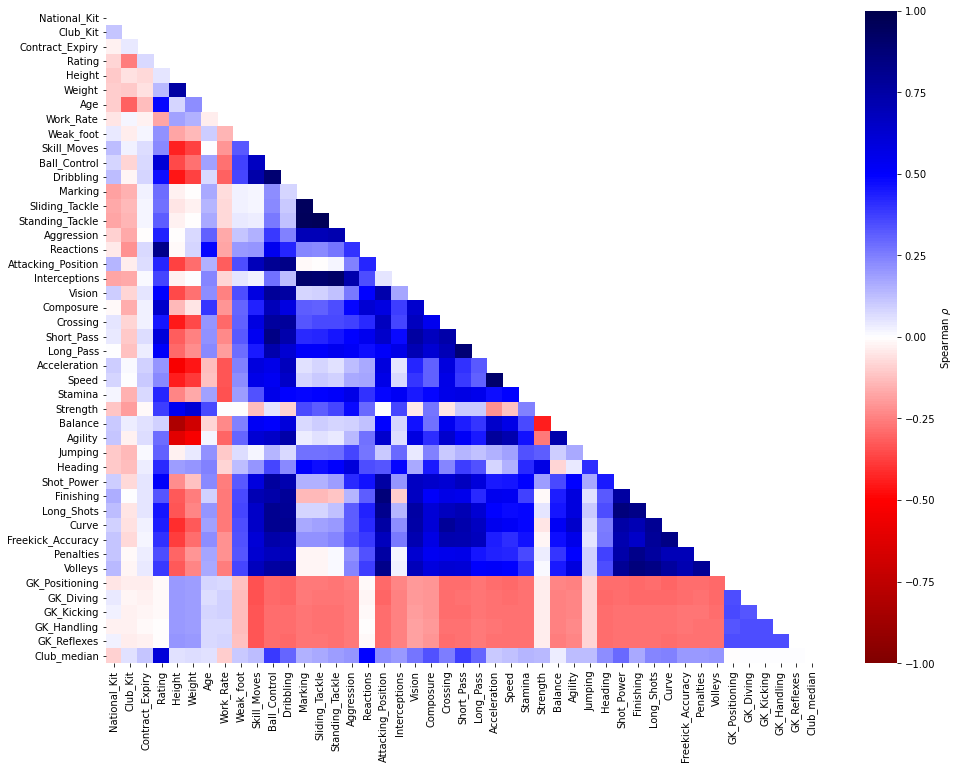

In [ ]:
# lets first visualizate all the parameters correlation:
spearman_corr = df_fifa.corr(method='spearman')
mask = np.zeros_like(spearman_corr)
mask[np.triu_indices_from(mask)] = True

fig, ax = plt.subplots(1, figsize=(16,12))
ax = sns.heatmap(
                 spearman_corr,
                 cmap='seismic_r',
                 vmin=-1,
                 vmax=1,
                 mask=mask,
                 cbar_kws={'label': r'Spearman $\rho$'}
                )

## Cleaning the data

We have to clean part of the data:
1. convert "Weight" column to integers from string.
2. convert "Height" column to integers from string.
3. Convert "Work_Rate" column to nominal from ordinal.


In [ ]:
"""

# convert "Weight" column to integers from string:

compare = pd.DataFrame()
compare["original_weight_column"] = df_fifa['Weight']


#  choose the first word in the column values (the weight):

df_fifa['Weight'] = df_fifa['Weight'].str.split(' ').str[0]


# convert the type of column to int:

df_fifa['Weight'] = pd.to_numeric(df_fifa['Weight'], errors='coerce')



compare["new_weight_column"] = df_fifa['Weight']
compare.head(7)

"""

'\n\n# convert "Weight" column to integers from string:\n\ncompare = pd.DataFrame()\ncompare["original_weight_column"] = df_fifa[\'Weight\']\n\n\n#  choose the first word in the column values (the weight):\n\ndf_fifa[\'Weight\'] = df_fifa[\'Weight\'].str.split(\' \').str[0]\n\n\n# convert the type of column to int:\n\ndf_fifa[\'Weight\'] = pd.to_numeric(df_fifa[\'Weight\'], errors=\'coerce\')\n\n\n\ncompare["new_weight_column"] = df_fifa[\'Weight\']\ncompare.head(7)\n\n'

In [ ]:
"""

# convert "Height" column to integers from string:

compare2 = pd.DataFrame()
compare2["original_height_column"] = df_fifa['Height']


#  choose the first word in the column values (the weight):

df_fifa['Height'] = df_fifa['Height'].str.split(' ').str[0]


# convert the type of column to int:

df_fifa['Height'] = pd.to_numeric(df_fifa['Height'], errors='coerce')


compare2["new_height_column"] = df_fifa['Height']
compare2.head(7)

"""

'\n\n# convert "Height" column to integers from string:\n\ncompare2 = pd.DataFrame()\ncompare2["original_height_column"] = df_fifa[\'Height\']\n\n\n#  choose the first word in the column values (the weight):\n\ndf_fifa[\'Height\'] = df_fifa[\'Height\'].str.split(\' \').str[0]\n\n\n# convert the type of column to int:\n\ndf_fifa[\'Height\'] = pd.to_numeric(df_fifa[\'Height\'], errors=\'coerce\')\n\n\ncompare2["new_height_column"] = df_fifa[\'Height\']\ncompare2.head(7)\n\n'

In [ ]:
"""

# Convert "Work_Rate" column to nominal from ordinal:
compare = pd.DataFrame()
compare["original_work_rate_column"] = df_fifa[ "Work_Rate"]

# list of ordinal options from high to low:
ordinal = ['High / High','High / Medium','High / Low','Medium / High',
           'Medium / Medium',  'Medium / Low',
         'Low / High', 'Low / Medium','Low / Low']
# values between 1-9 
nominal = [i for i in range (1,10)]        

# replace the ordinal column to the nominal values:
df_fifa[ "Work_Rate"].replace(ordinal,
                        nominal, inplace=True)
compare["new_work_rate_column"] = df_fifa[ "Work_Rate"]
compare.head(11)

"""

'\n\n# Convert "Work_Rate" column to nominal from ordinal:\ncompare = pd.DataFrame()\ncompare["original_work_rate_column"] = df_fifa[ "Work_Rate"]\n\n# list of ordinal options from high to low:\nordinal = [\'High / High\',\'High / Medium\',\'High / Low\',\'Medium / High\',\n           \'Medium / Medium\',  \'Medium / Low\',\n         \'Low / High\', \'Low / Medium\',\'Low / Low\']\n# values between 1-9 \nnominal = [i for i in range (1,10)]        \n\n# replace the ordinal column to the nominal values:\ndf_fifa[ "Work_Rate"].replace(ordinal,\n                        nominal, inplace=True)\ncompare["new_work_rate_column"] = df_fifa[ "Work_Rate"]\ncompare.head(11)\n\n'

In [ ]:
"""

# display the clean data :

df_fifa.info()

"""

'\n\n# display the clean data :\n\ndf_fifa.info()\n\n'

## add a column of the player's continent :

In [ ]:
#pip install pycountry-convert

In [ ]:
"""

# import the module and define a function to get the continent from the country name :

import pycountry_convert as pc

def country_to_continent(country_name):
    country_alpha2 = pc.country_name_to_country_alpha2(country_name)
    country_continent_code = pc.country_alpha2_to_continent_code(country_alpha2)
    country_continent_name = pc.convert_continent_code_to_continent_name(country_continent_code)
    return country_continent_name



# check the function :

print( country_to_continent('Germany') )

"""

"\n\n# import the module and define a function to get the continent from the country name :\n\nimport pycountry_convert as pc\n\ndef country_to_continent(country_name):\n    country_alpha2 = pc.country_name_to_country_alpha2(country_name)\n    country_continent_code = pc.country_alpha2_to_continent_code(country_alpha2)\n    country_continent_name = pc.convert_continent_code_to_continent_name(country_continent_code)\n    return country_continent_name\n\n\n\n# check the function :\n\nprint( country_to_continent('Germany') )\n\n"

In [ ]:
"""

# create a list with the countries names,
# and get rid of the country values the module doesn't know :

countries_clean = df_fifa.Nationality.unique().tolist()

del (
     countries_clean[ countries_clean.index('Wales') ],
     countries_clean[ countries_clean.index('England') ],
     countries_clean[ countries_clean.index('Bosnia Herzegovina') ],
     countries_clean[ countries_clean.index('Republic of Ireland') ],
     countries_clean[ countries_clean.index('DR Congo') ],
     countries_clean[ countries_clean.index('Korea Republic') ],
     countries_clean[ countries_clean.index('Northern Ireland') ],
     countries_clean[ countries_clean.index('Scotland') ],
     countries_clean[ countries_clean.index('Guinea Bissau') ],
     countries_clean[ countries_clean.index('Kosovo') ],
     countries_clean[ countries_clean.index('São Tomé & Príncipe') ],
     countries_clean[ countries_clean.index('Curacao') ],
     countries_clean[ countries_clean.index('FYR Macedonia') ],
     countries_clean[ countries_clean.index('FIFA16_NationName_215') ],
     countries_clean[ countries_clean.index('Central African Rep.') ],
     countries_clean[ countries_clean.index('St Kitts Nevis') ],
     countries_clean[ countries_clean.index('Trinidad & Tobago') ],
     countries_clean[ countries_clean.index('China PR') ],
     countries_clean[ countries_clean.index('Chinese Taipei') ],
     countries_clean[ countries_clean.index('Antigua & Barbuda') ],
     countries_clean[ countries_clean.index('Korea DPR') ],
     countries_clean[ countries_clean.index('Timor-Leste') ],
     countries_clean[ countries_clean.index('St Lucia') ]
     )

"""
     

"\n\n# create a list with the countries names,\n# and get rid of the country values the module doesn't know :\n\ncountries_clean = df_fifa.Nationality.unique().tolist()\n\ndel (\n     countries_clean[ countries_clean.index('Wales') ],\n     countries_clean[ countries_clean.index('England') ],\n     countries_clean[ countries_clean.index('Bosnia Herzegovina') ],\n     countries_clean[ countries_clean.index('Republic of Ireland') ],\n     countries_clean[ countries_clean.index('DR Congo') ],\n     countries_clean[ countries_clean.index('Korea Republic') ],\n     countries_clean[ countries_clean.index('Northern Ireland') ],\n     countries_clean[ countries_clean.index('Scotland') ],\n     countries_clean[ countries_clean.index('Guinea Bissau') ],\n     countries_clean[ countries_clean.index('Kosovo') ],\n     countries_clean[ countries_clean.index('São Tomé & Príncipe') ],\n     countries_clean[ countries_clean.index('Curacao') ],\n     countries_clean[ countries_clean.index('FYR Macedoni

In [ ]:
"""

# create a dictionary with the nations as keys and the continents as values :

continents = {}

for i in range( len( countries_clean ) ):
    continents[ countries_clean[i] ] = country_to_continent( countries_clean[i] )

# manually add to the dictionary the nations unrecognized by the module :

continents['Wales'] = 'Europe'
continents[ 'England' ] = 'Europe'
continents[ 'Bosnia Herzegovina' ] = 'Europe'
continents[ 'Republic of Ireland' ] = 'Europe'
continents[ 'DR Congo' ] = 'Africa'
continents[ 'Korea Republic' ] = 'Asia'
continents[ 'Northern Ireland' ] = 'Europe'
continents[ 'Scotland' ] = 'Europe'
continents[ 'Guinea Bissau' ] = 'Africa'
continents[ 'Kosovo' ] = 'Europe'
continents[ 'São Tomé & Príncipe' ] = 'Africa'
continents[ 'Curacao' ] = 'North America'
continents[ 'FYR Macedonia' ] = 'Europe'
continents[ 'FIFA16_NationName_215' ] = ''
continents[ 'Central African Rep.' ] = 'Africa'
continents[ 'St Kitts Nevis' ] = 'North America'
continents[ 'Trinidad & Tobago' ] = 'South America'
continents[ 'China PR' ] = 'Asia'
continents[ 'Chinese Taipei' ] = 'Asia'
continents[ 'Antigua & Barbuda' ] = 'North America'
continents[ 'Korea DPR' ] = 'Asia'
continents[ 'Timor-Leste' ] = 'Asia'
continents[ 'St Lucia' ] = 'North America'

"""

"\n\n# create a dictionary with the nations as keys and the continents as values :\n\ncontinents = {}\n\nfor i in range( len( countries_clean ) ):\n    continents[ countries_clean[i] ] = country_to_continent( countries_clean[i] )\n\n# manually add to the dictionary the nations unrecognized by the module :\n\ncontinents['Wales'] = 'Europe'\ncontinents[ 'England' ] = 'Europe'\ncontinents[ 'Bosnia Herzegovina' ] = 'Europe'\ncontinents[ 'Republic of Ireland' ] = 'Europe'\ncontinents[ 'DR Congo' ] = 'Africa'\ncontinents[ 'Korea Republic' ] = 'Asia'\ncontinents[ 'Northern Ireland' ] = 'Europe'\ncontinents[ 'Scotland' ] = 'Europe'\ncontinents[ 'Guinea Bissau' ] = 'Africa'\ncontinents[ 'Kosovo' ] = 'Europe'\ncontinents[ 'São Tomé & Príncipe' ] = 'Africa'\ncontinents[ 'Curacao' ] = 'North America'\ncontinents[ 'FYR Macedonia' ] = 'Europe'\ncontinents[ 'FIFA16_NationName_215' ] = ''\ncontinents[ 'Central African Rep.' ] = 'Africa'\ncontinents[ 'St Kitts Nevis' ] = 'North America'\ncontinents[ 'T

In [ ]:
"""

# create an array for the column of continents :

nations = np.array( df_fifa.Nationality )

continent_column = np.zeros_like( nations )

for nation in range( len(nations) ):
    continent_column[nation] = continents[ nations[nation] ]


# add to the df a column of the continent :

df_fifa[ 'Continent' ] = continent_column

"""

"\n\n# create an array for the column of continents :\n\nnations = np.array( df_fifa.Nationality )\n\ncontinent_column = np.zeros_like( nations )\n\nfor nation in range( len(nations) ):\n    continent_column[nation] = continents[ nations[nation] ]\n\n\n# add to the df a column of the continent :\n\ndf_fifa[ 'Continent' ] = continent_column\n\n"

In [ ]:
"""

# display the values in the continent column :

df_fifa.Continent.unique()

"""

'\n\n# display the values in the continent column :\n\ndf_fifa.Continent.unique()\n\n'

## add a column of the player's league :

In [ ]:
"""

# Yehuda :

# path for the csv file of the leagues :

path = '/content/drive/MyDrive/gdrive_folder/Courses/Intro_Data_Science/Final_project_FIFA/fifa_leagues.csv'


# read the csv file of the leagues :

df_leagues = pd.read_csv( path )


# display :

df_leagues.head()

"""

"\n\n# Yehuda :\n\n# path for the csv file of the leagues :\n\npath = '/content/drive/MyDrive/gdrive_folder/Courses/Intro_Data_Science/Final_project_FIFA/fifa_leagues.csv'\n\n\n# read the csv file of the leagues :\n\ndf_leagues = pd.read_csv( path )\n\n\n# display :\n\ndf_leagues.head()\n\n"

In [ ]:
"""

# Yuval :

# path for the csv file of the leagues :

path = '/content/drive/MyDrive/fifa_leagues.csv'


# read the csv file of the leagues :

df_leagues = pd.read_csv( path )


# display :

df_leagues.head()

"""

"\n\n# Yuval :\n\n# path for the csv file of the leagues :\n\npath = '/content/drive/MyDrive/fifa_leagues.csv'\n\n\n# read the csv file of the leagues :\n\ndf_leagues = pd.read_csv( path )\n\n\n# display :\n\ndf_leagues.head()\n\n"

In [ ]:
"""

# dictionary for the leagues and their clubs :

league_clubs = {}
strange_names = []

for liga, teams in df_leagues.iteritems():
    for team in teams:
        team_name = str(team)
        if team_name.strip('*') in df_fifa.Club.unique():
            league_clubs[ team_name.strip('*') ] = liga
        elif team_name != 'nan':
            strange_names.append( team_name )

"""

"\n\n# dictionary for the leagues and their clubs :\n\nleague_clubs = {}\nstrange_names = []\n\nfor liga, teams in df_leagues.iteritems():\n    for team in teams:\n        team_name = str(team)\n        if team_name.strip('*') in df_fifa.Club.unique():\n            league_clubs[ team_name.strip('*') ] = liga\n        elif team_name != 'nan':\n            strange_names.append( team_name )\n\n"

In [ ]:
"""

# create an array for the column of the league :

clubs_array = np.array( df_fifa.Club )

league_array = np.zeros_like( clubs_array )

for i in range( len(clubs_array) ):
    if clubs_array[ i ] in list( league_clubs.keys() ):
        league_array[ i ] = league_clubs[ clubs_array[ i ] ]


# add to the df a column of the continent :

df_fifa[ 'League' ] = league_array

"""

"\n\n# create an array for the column of the league :\n\nclubs_array = np.array( df_fifa.Club )\n\nleague_array = np.zeros_like( clubs_array )\n\nfor i in range( len(clubs_array) ):\n    if clubs_array[ i ] in list( league_clubs.keys() ):\n        league_array[ i ] = league_clubs[ clubs_array[ i ] ]\n\n\n# add to the df a column of the continent :\n\ndf_fifa[ 'League' ] = league_array\n\n"

## add a column of position in the field :

In [ ]:
"""

# crate a field position column (goalkeeper/defensive/midfield/attacking/substitute/reserves) :

positions = {
            'LW' : 'attacking',
            'RW' : 'attacking',
            'ST' : 'attacking',
            'GK' : 'goalkeeper',
            'Sub' : 'substitute',
            'RCM' : 'midfield',
            'CAM' : 'midfield',
            'LCB' : 'defensive',
            'LCM' : 'midfield',
            'RS' : 'attacking',
            'RB' : 'defensive',
            'RCB' : 'defensive',
            'LM' : 'midfield',
            'LDM' : 'midfield',
            'RM' : 'midfield',
            'LB' : 'defensive',
            'CDM' : 'midfield',
            'RDM' : 'midfield',
            'LF' : 'attacking',
            'CB' : 'defensive',
            'LAM' : 'midfield',
            'Res' : 'reserves',
            'CM' : 'midfield',
            'LS' : 'attacking',
            'RF' : 'attacking',
            'RWB' : 'defensive',
            'RAM' : 'midfield',
            'LWB' : 'defensive',
            'CF' : 'attacking'
            }



# create an array for the column of positions :

pos = np.array( df_fifa.Club_Position )
pre_pos = np.array( df_fifa.Preffered_Position )

positions_column = np.zeros_like( pos )
preffered_positions_column = np.zeros_like( pre_pos )

for position in range( len(pos) ):
    if type( pos[position] ) == str:
        positions_column[position] = positions[ pos[position] ]
        preffered = pre_pos[position]
        if '/' in preffered:
            preffered_positions_column[position] = positions[ preffered[  : preffered.index('/') ] ]
        else:
            preffered_positions_column[position] = positions[ preffered ]
    else:
        positions_column[position] = 'nan'
        preffered_positions_column[position] = 'nan'



# add new columns to the dataframe :

df_fifa[ 'Field_Position' ] = positions_column

df_fifa[ 'Field_Preffered_Position' ] = preffered_positions_column

# display the values :

print( df_fifa.Field_Position.unique() )
print( df_fifa.Field_Preffered_Position.unique() )

"""

"\n\n# crate a field position column (goalkeeper/defensive/midfield/attacking/substitute/reserves) :\n\npositions = {\n            'LW' : 'attacking',\n            'RW' : 'attacking',\n            'ST' : 'attacking',\n            'GK' : 'goalkeeper',\n            'Sub' : 'substitute',\n            'RCM' : 'midfield',\n            'CAM' : 'midfield',\n            'LCB' : 'defensive',\n            'LCM' : 'midfield',\n            'RS' : 'attacking',\n            'RB' : 'defensive',\n            'RCB' : 'defensive',\n            'LM' : 'midfield',\n            'LDM' : 'midfield',\n            'RM' : 'midfield',\n            'LB' : 'defensive',\n            'CDM' : 'midfield',\n            'RDM' : 'midfield',\n            'LF' : 'attacking',\n            'CB' : 'defensive',\n            'LAM' : 'midfield',\n            'Res' : 'reserves',\n            'CM' : 'midfield',\n            'LS' : 'attacking',\n            'RF' : 'attacking',\n            'RWB' : 'defensive',\n            'RAM' : 

In [ ]:
# crate a more precise field position column (goalkeeper/defensive/defensive_winger/midfield/attacking/substitute/reserves) :

positions = {
            'LW' : 'attacking',
            'RW' : 'attacking',
            'ST' : 'attacking',
            'GK' : 'goalkeeper',
            'Sub' : 'substitute',
            'RCM' : 'midfield',
            'CAM' : 'attacking midfield',
            'LCB' : 'defending',
            'LCM' : 'midfield',
            'RS' : 'attacking',
            'RB' : 'defending',
            'RCB' : 'defending',
            'LM' : 'midfield',
            'LDM' : 'defending midfield',
            'RM' : 'midfield',
            'LB' : 'defending',
            'CDM' : 'defending midfield',
            'RDM' : 'defending midfield',
            'LF' : 'attacking',
            'CB' : 'defending',
            'LAM' : 'attacking midfield',
            'Res' : 'reserves',
            'CM' : 'midfield',
            'LS' : 'attacking',
            'RF' : 'attacking',
            'RWB' : 'defending',
            'RAM' : 'attacking midfield',
            'LWB' : 'defending',
            'CF' : 'attacking'
            }



# create an array for the column of positions :

pos = np.array( df_fifa_unprocessed.Club_Position )
pre_pos = np.array( df_fifa_unprocessed.Preffered_Position )

positions_column = np.zeros_like( pos )
preffered_positions_column = np.zeros_like( pre_pos )

for position in range( len(pos) ):
    if type( pos[position] ) == str:
        positions_column[position] = positions[ pos[position] ]
        preffered = pre_pos[position]
        if '/' in preffered:
            preffered_positions_column[position] = positions[ preffered[  : preffered.index('/') ] ]
        else:
            preffered_positions_column[position] = positions[ preffered ]
    else:
        positions_column[position] = 'nan'
        preffered_positions_column[position] = 'nan'



# add new columns to the dataframe :

df_fifa[ 'Field_Precise_Position' ] = positions_column

df_fifa[ 'Field_Precise_Preffered_Position' ] = preffered_positions_column

# display the values :

print( df_fifa.Field_Precise_Position.unique() )
print( df_fifa.Field_Precise_Preffered_Position.unique() )

['attacking' 'goalkeeper' 'substitute' 'midfield' 'attacking midfield'
 'defending' 'defending midfield' 'reserves' 'nan']
['attacking' 'goalkeeper' 'defending' 'midfield' 'attacking midfield'
 'defending midfield' 'nan']


## column of the number of the league in the country :

In [ ]:
# create a column of the number of the league in the country :

df_fifa['league_number_in_the_country'] = [ int( league[-1] ) for league in df_fifa[ 'League_Country_number' ] ]

df_fifa['league_number_in_the_country'][ df_fifa['league_number_in_the_country'] == 0 ] = 'nan'

df_fifa['league_number_in_the_country']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


0          1
1          1
2          1
3          1
4          1
        ... 
17583    nan
17584      1
17585      3
17586      1
17587      4
Name: league_number_in_the_country, Length: 17588, dtype: object

## clustermaps :

In [ ]:
# dataframe of numeric data :

df_numeric = df_fifa[ df_fifa.columns[9:].tolist() ].select_dtypes(exclude=['object'])




# the data without goalkeepers :

df_without_keepers = df_fifa.loc[ df_fifa[ 'Field_Preffered_Position' ] != 'goalkeeper' ]


# dataframe of numeric data without goalkeepers :

df_without_keepers_numeric = df_without_keepers[ df_without_keepers.columns[9:].tolist() ].select_dtypes( exclude = ['object'] )



df_numeric.head()

Rating  Height  Weight  Age  Work_Rate  Weak_foot  Skill_Moves  \
0      94     185      80   32          3          4            5   
1      93     170      72   29          5          4            4   
2      92     174      68   25          2          5            5   
3      92     182      85   30          2          4            4   
4      92     193      92   31          5          4            1   

   Ball_Control  Dribbling  Marking  ...  Curve  Freekick_Accuracy  Penalties  \
0            93         92       22  ...     81                 76         85   
1            95         97       13  ...     89                 90         74   
2            95         96       21  ...     79                 84         81   
3            91         86       30  ...     86                 84         85   
4            48         30       10  ...     14                 11         47   

   Volleys  GK_Positioning  GK_Diving  GK_Kicking  GK_Handling  GK_Reflexes  \
0       88              14          7          15           11           11   
1       85              14          6          15           11            8   
2       83              15          9          15            9           11   
3       88              33         27          31           25           37   
4       11              91         89          95           90           89   

   Club_median  
0         82.0  
1         80.0  
2         80.0  
3         80.0  
4         83.0  

[5 rows x 42 columns]

### by continent :

clustermap by continent :


/usr/local/lib/python3.7/dist-packages/seaborn/matrix.py:654: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


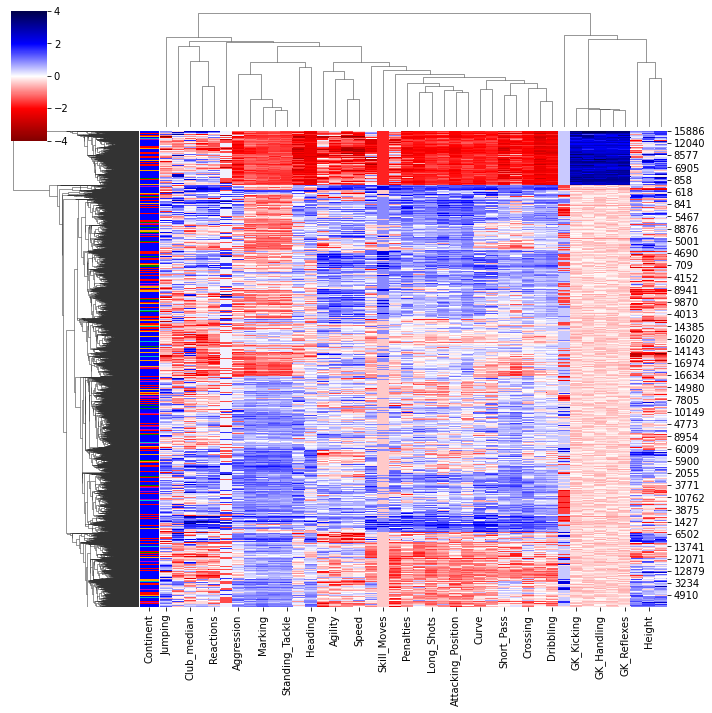

In [ ]:
# row colors :

continent_color = {
                  'Europe' : 'b',
                  'South America' : 'r',
                  'Africa' : 'g',
                  'Asia' : 'orange',
                  'North America' : 'm',
                  'Oceania' : 'c'
                  }

row_colors = df_fifa[ "Continent" ].map( continent_color )


# plot a clustermap :

print('clustermap by continent :')

sns.clustermap(data = df_numeric,
               z_score = True,
               cmap = 'seismic_r',
               vmin = -4,
               vmax = 4,
               row_colors = row_colors
              )

plt.show()

### by preffered foot :

clustermap by preffered foot :


/usr/local/lib/python3.7/dist-packages/seaborn/matrix.py:654: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


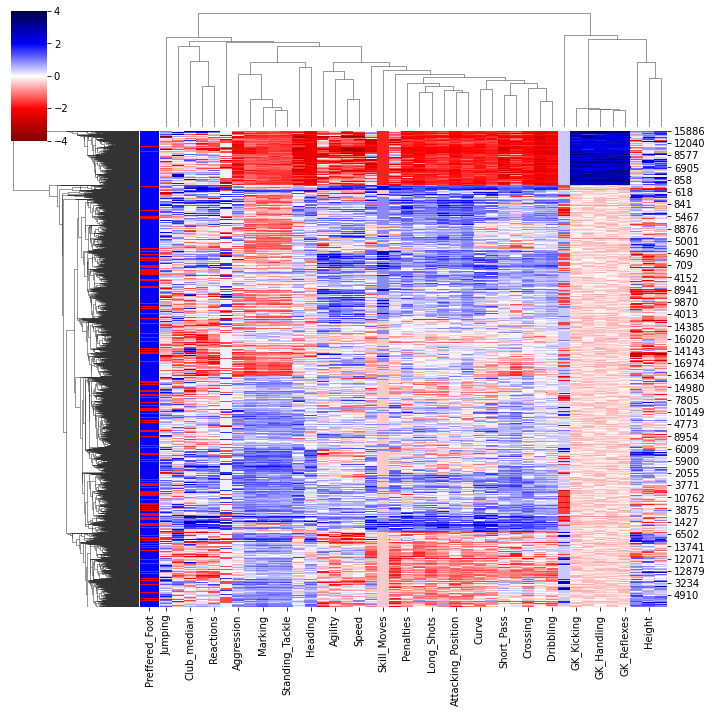

In [ ]:
# row colors :

preffered_foot_color = {
                      'Right' : 'b',
                      'Left' : 'r'
                       }

row_colors = df_fifa[ "Preffered_Foot" ].map( preffered_foot_color )


# plot a clustermap :

print('clustermap by preffered foot :')

sns.clustermap(data = df_numeric,
               z_score = True,
               cmap = 'seismic_r',
               vmin = -4,
               vmax = 4,
               row_colors = row_colors
              )

plt.show()

### by field position :



clustermap by continent :


/usr/local/lib/python3.7/dist-packages/seaborn/matrix.py:654: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


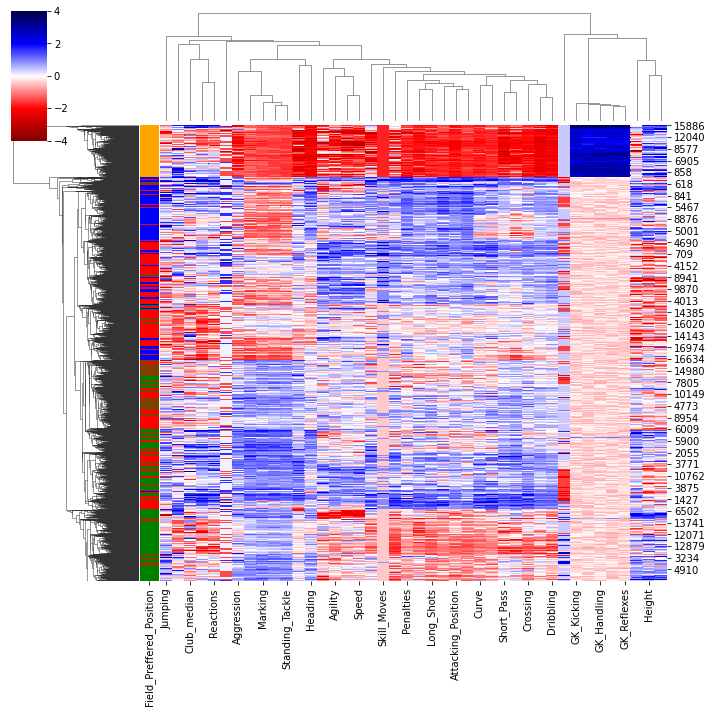

In [ ]:
# row colors :

position_color = {
                  'attacking' : 'b',
                  'midfield' : 'r',
                  'defensive' : 'g',
                  'goalkeeper' : 'orange',
                  'substitute' : 'm',
                  'reserves' : 'c'
                  }

row_colors = df_fifa[ "Field_Preffered_Position" ].map( position_color )


# plot a clustermap :

print('clustermap by continent :')

sns.clustermap(data = df_numeric,
               z_score = True,
               cmap = 'seismic_r',
               vmin = -4,
               vmax = 4,
               row_colors = row_colors
              )

plt.show()

## without the goalkeepers :

clustermap by continent :


/usr/local/lib/python3.7/dist-packages/seaborn/matrix.py:654: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


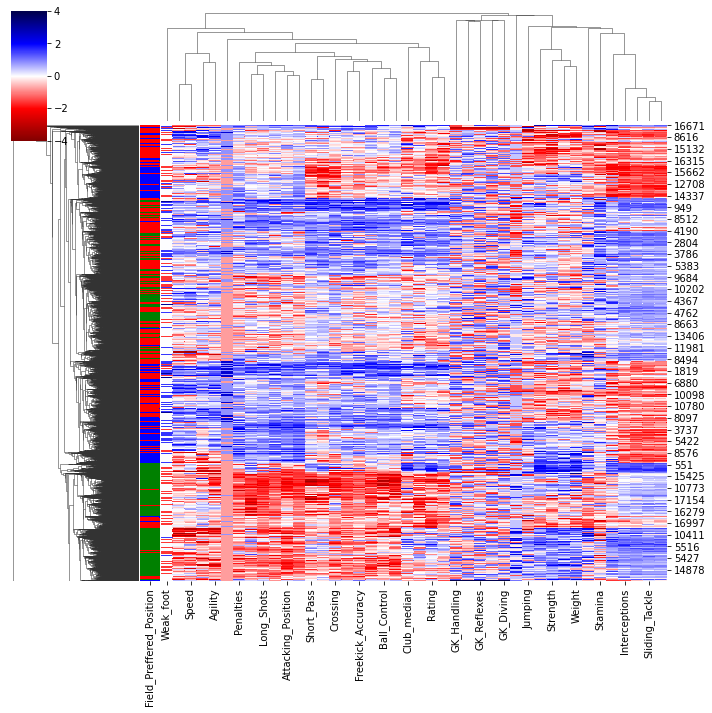

In [ ]:
# row colors :

position_color = {
                  'attacking' : 'b',
                  'midfield' : 'r',
                  'defensive' : 'g',
                  'goalkeeper' : 'orange',
                  'substitute' : 'm',
                  'reserves' : 'c'
                  }

row_colors = df_without_keepers[ "Field_Preffered_Position" ].map( position_color )


# plot a clustermap :

print('clustermap by continent :')

sns.clustermap(data = df_without_keepers_numeric,
               z_score = True,
               cmap = 'seismic_r',
               vmin = -4,
               vmax = 4,
               row_colors = row_colors
              )

plt.show()


## with the more precise position :

clustermap by continent :


/usr/local/lib/python3.7/dist-packages/seaborn/matrix.py:654: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


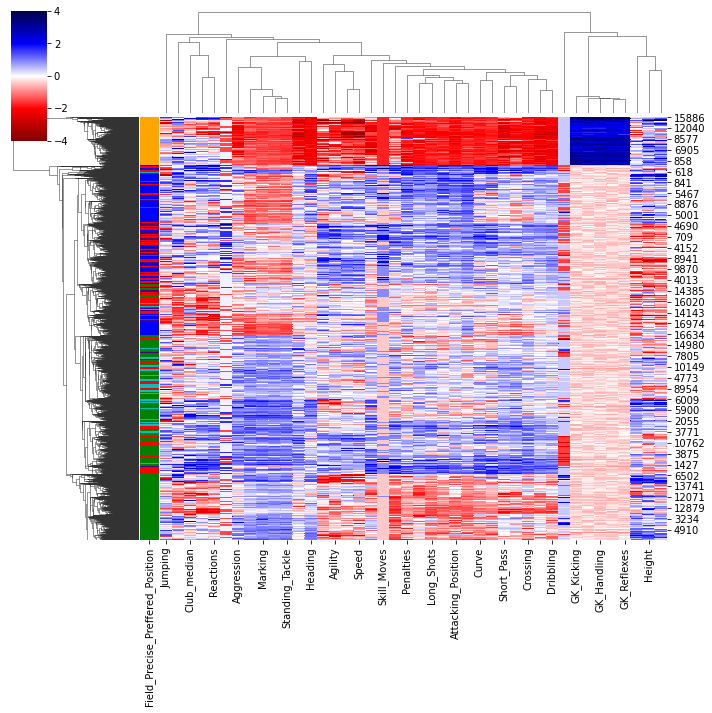

In [ ]:
# row colors :

position_color = {
                  'attacking' : 'b',
                  'midfield' : 'r',
                  'defending' : 'g',
                  'defending midfield' : 'c',
                  'attacking midfield' : 'indigo',
                  'goalkeeper' : 'orange',
                  'substitute' : 'm',
                  'reserves' : 'c'
                  }

row_colors = df_fifa[ "Field_Precise_Preffered_Position" ].map( position_color )


# plot a clustermap :

print('clustermap by continent :')

sns.clustermap(data = df_numeric,
               z_score = True,
               cmap = 'seismic_r',
               vmin = -4,
               vmax = 4,
               row_colors = row_colors
              )

plt.show()

## without the keeper :

clustermap by continent :


/usr/local/lib/python3.7/dist-packages/seaborn/matrix.py:654: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


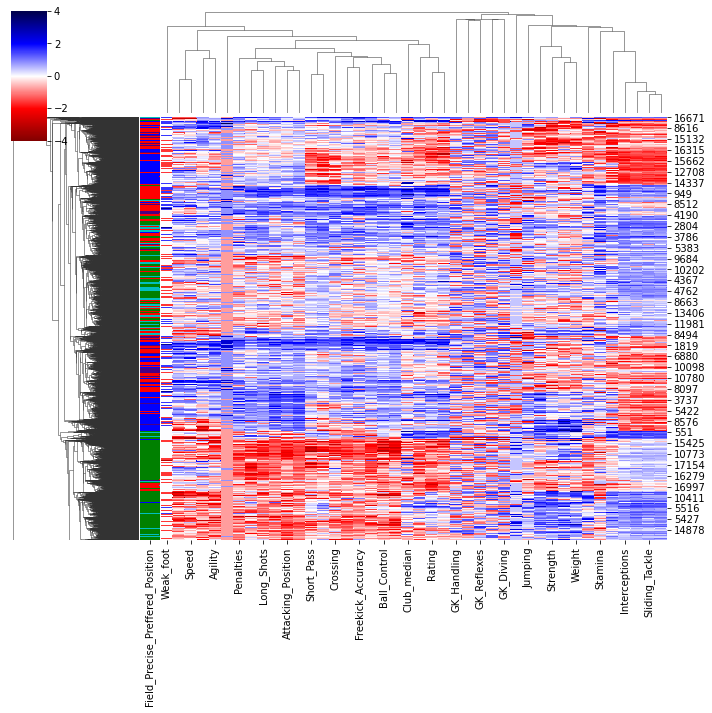

In [ ]:
# row colors :

position_color = {
                  'attacking' : 'b',
                  'midfield' : 'r',
                  'defending' : 'g',
                  'defending midfield' : 'c',
                  'attacking midfield' : 'indigo',
                  'goalkeeper' : 'orange',
                  'substitute' : 'm',
                  'reserves' : 'c'
                  }

row_colors = df_without_keepers[ "Field_Precise_Preffered_Position" ].map( position_color )


# plot a clustermap :

print('clustermap by continent :')

sns.clustermap(data = df_without_keepers_numeric,
               z_score = True,
               cmap = 'seismic_r',
               vmin = -4,
               vmax = 4,
               row_colors = row_colors
              )

plt.show()

## PCA :

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
z = df_numeric.apply(lambda x:(x-x.mean())/x.std(), axis=0)
pca = PCA().fit(z)
X_trans = pca.transform(z)

pca by Continent :


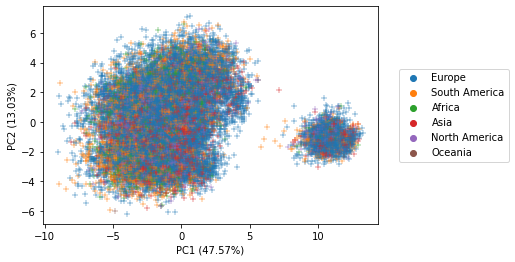

In [ ]:
color_var = 'Continent'
colors = df_fifa[color_var]

print( 'pca by', color_var, ':' )

g = sns.scatterplot(x=X_trans[:,0], y=X_trans[:,1], marker="+", hue=colors)
plt.xlabel('PC1 ({:.2f}%)'.format(100*pca.explained_variance_ratio_[0]))
plt.ylabel('PC2 ({:.2f}%)'.format(100*pca.explained_variance_ratio_[1]))

plt.legend(loc=6, bbox_to_anchor=(1.05, 0.5))
plt.show()

pca by Preffered_Foot :


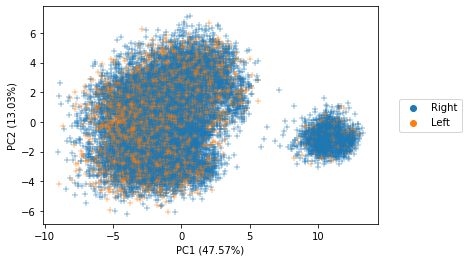

In [ ]:
color_var = 'Preffered_Foot'
colors = df_fifa[color_var]

print( 'pca by', color_var, ':' )

g = sns.scatterplot(x=X_trans[:,0], y=X_trans[:,1], marker="+", hue=colors)
plt.xlabel('PC1 ({:.2f}%)'.format(100*pca.explained_variance_ratio_[0]))
plt.ylabel('PC2 ({:.2f}%)'.format(100*pca.explained_variance_ratio_[1]))

plt.legend(loc=6, bbox_to_anchor=(1.05, 0.5))
plt.show()

pca by Club_Position :


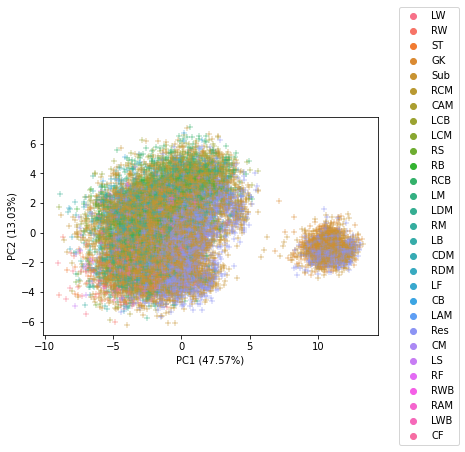

In [ ]:
color_var = 'Club_Position'
colors = df_fifa[color_var]

print( 'pca by', color_var, ':' )

g = sns.scatterplot(x=X_trans[:,0], y=X_trans[:,1], marker="+", hue=colors)
plt.xlabel('PC1 ({:.2f}%)'.format(100*pca.explained_variance_ratio_[0]))
plt.ylabel('PC2 ({:.2f}%)'.format(100*pca.explained_variance_ratio_[1]))

plt.legend(loc=6, bbox_to_anchor=(1.05, 0.5))
plt.show()

pca by Field_Position :


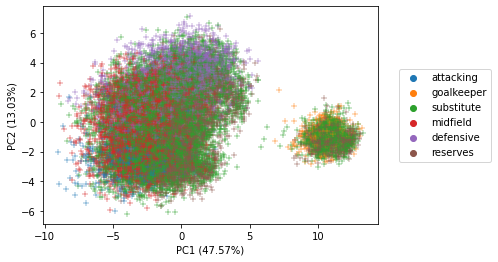

In [ ]:
color_var = 'Field_Position'
colors = df_fifa[color_var]

print( 'pca by', color_var, ':' )

g = sns.scatterplot(x=X_trans[:,0], y=X_trans[:,1], marker="+", hue=colors)
plt.xlabel('PC1 ({:.2f}%)'.format(100*pca.explained_variance_ratio_[0]))
plt.ylabel('PC2 ({:.2f}%)'.format(100*pca.explained_variance_ratio_[1]))

plt.legend(loc=6, bbox_to_anchor=(1.05, 0.5))
plt.show()

pca by Field_Preffered_Position :


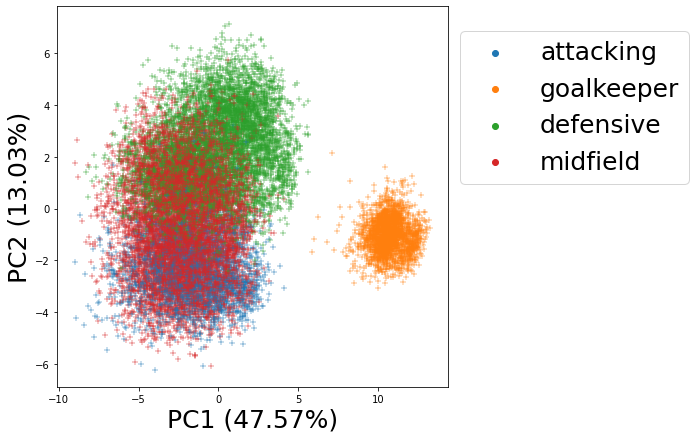

In [ ]:
color_var = 'Field_Preffered_Position'
colors = df_fifa[color_var]

print( 'pca by', color_var, ':' )

fig = plt.figure( figsize = (7, 7) )

g = sns.scatterplot(
                    x=X_trans[:,0],
                    y=X_trans[:,1],
                    marker="+",
                    hue=colors)


plt.xlabel(
           'PC1 ({:.2f}%)'.format(100*pca.explained_variance_ratio_[0]),
           fontsize = 25
           )

plt.ylabel(
           'PC2 ({:.2f}%)'.format(100*pca.explained_variance_ratio_[1]),
           fontsize = 25
           )


plt.legend(
           loc = 3,
           bbox_to_anchor = (1.0, 0.5),
           fontsize = 25
           )

plt.show()

pca by Field_Precise_Preffered_Position :


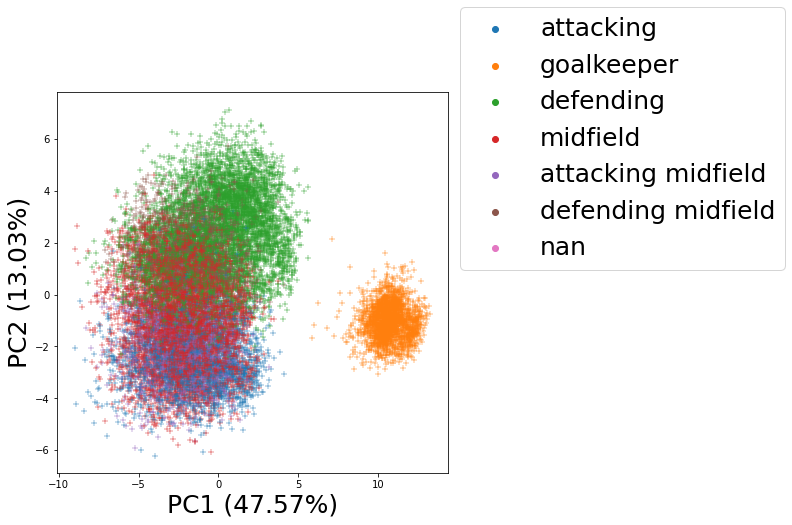

In [ ]:
color_var = 'Field_Precise_Preffered_Position'
colors = df_fifa[color_var]

print( 'pca by', color_var, ':' )

fig = plt.figure( figsize = (7, 7) )

g = sns.scatterplot(
                    x=X_trans[:,0],
                    y=X_trans[:,1],
                    marker="+",
                    hue=colors)


plt.xlabel(
           'PC1 ({:.2f}%)'.format(100*pca.explained_variance_ratio_[0]),
           fontsize = 25
           )

plt.ylabel(
           'PC2 ({:.2f}%)'.format(100*pca.explained_variance_ratio_[1]),
           fontsize = 25
           )


plt.legend(
           loc = 3,
           bbox_to_anchor = (1.0, 0.5),
           fontsize = 25
           )

plt.show()

pca by Field_Preffered_Position :


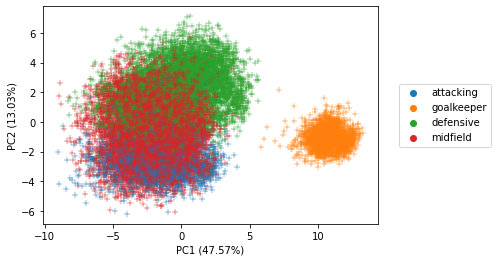

In [ ]:
color_var = 'Field_Preffered_Position'
colors = df_fifa[color_var]

print( 'pca by', color_var, ':' )

g = sns.scatterplot(x=X_trans[:,0], y=X_trans[:,1], marker="+", hue=colors)
plt.xlabel('PC1 ({:.2f}%)'.format(100*pca.explained_variance_ratio_[0]))
plt.ylabel('PC2 ({:.2f}%)'.format(100*pca.explained_variance_ratio_[1]))

plt.legend(loc=6, bbox_to_anchor=(1.05, 0.5))
plt.show()

In [ ]:
z_without_keepers = df_without_keepers_numeric.apply(lambda x:(x-x.mean())/x.std(), axis=0)
pca_without_keepers = PCA().fit(z_without_keepers)
X_trans_without_keepers = pca_without_keepers.transform(z_without_keepers)

pca by Field_Preffered_Position :


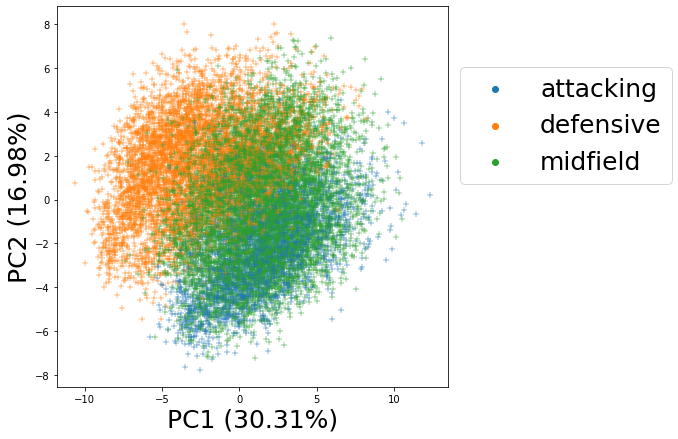

In [ ]:
color_var = 'Field_Preffered_Position'
colors = df_without_keepers[color_var]

print( 'pca by', color_var, ':' )

fig = plt.figure( figsize = (7, 7) )

g = sns.scatterplot(
                    x=X_trans_without_keepers[:,0],
                    y=X_trans_without_keepers[:,1],
                    marker="+",
                    hue=colors
                    )


plt.xlabel(
           'PC1 ({:.2f}%)'.format(100*pca_without_keepers.explained_variance_ratio_[0]),
           fontsize = 25
           )

plt.ylabel(
           'PC2 ({:.2f}%)'.format(100*pca_without_keepers.explained_variance_ratio_[1]),
           fontsize = 25
           )


plt.legend(
           loc = 3,
           bbox_to_anchor = (1.0, 0.5),
           fontsize = 25
           )

plt.show()

pca by Field_Precise_Preffered_Position :


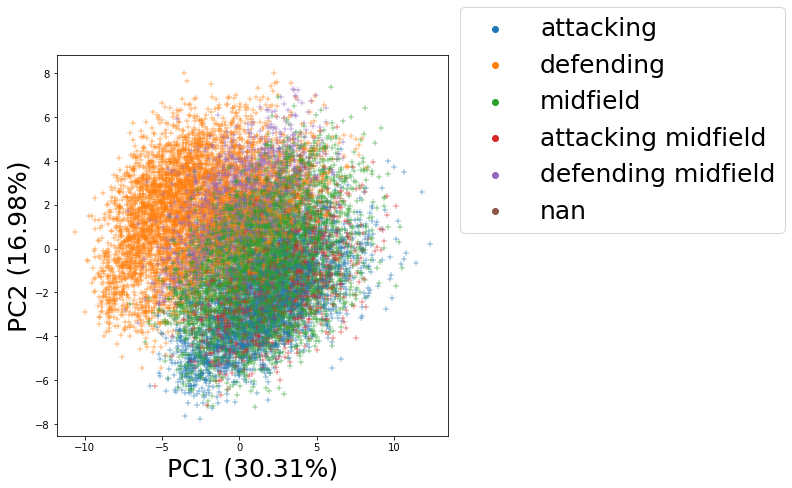

In [ ]:
color_var = 'Field_Precise_Preffered_Position'
colors = df_without_keepers[color_var]

print( 'pca by', color_var, ':' )

fig = plt.figure( figsize = (7, 7) )

g = sns.scatterplot(
                    x=X_trans_without_keepers[:,0],
                    y=X_trans_without_keepers[:,1],
                    marker="+",
                    hue=colors)


plt.xlabel(
           'PC1 ({:.2f}%)'.format(100*pca_without_keepers.explained_variance_ratio_[0]),
           fontsize = 25
           )

plt.ylabel(
           'PC2 ({:.2f}%)'.format(100*pca_without_keepers.explained_variance_ratio_[1]),
           fontsize = 25
           )


plt.legend(
           loc = 3,
           bbox_to_anchor = (1.0, 0.5),
           fontsize = 25
           )

plt.show()

## Basic Vizualization:

Plot some parameters to check if there is correlation:

1. Age & Rating
2. right and left legs differences
3. Speed Vs Weight
4. Rating Vs Nationality

## pairplots :

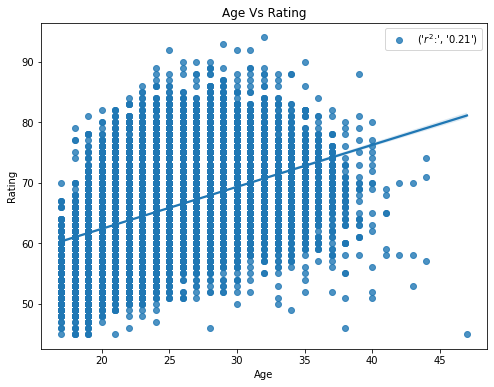

In [ ]:
x = df_fifa['Age'] #x column
y = df_fifa['Rating'] # y column
mask = ~np.isnan(x) & ~np.isnan(y)  # mask for non - Nan values
fig, ax = plt.subplots(1, figsize=(8,6))
slope, intercept, r_value, p_value, std_err = stats.linregress(x[mask], y[mask]) # statistic parameters
r2 =  round(r_value**2,3)
ax = sns.regplot(data=df_fifa, x="Age", y="Rating",label = ("$r^2$:", "{:.2f}".format(r_value**2)))
ax.set_title("Age Vs Rating")
plt.legend(loc='best')#, label="r-squared:", r_value**2)

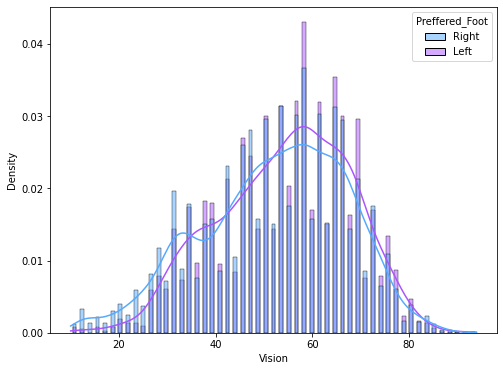

In [ ]:
# sns.pairplot(df_fifa[df_fifa.columns[17:]],hue= "Preffered_Foot")
fig, ax = plt.subplots(1, figsize=(8,6))
ax = sns.histplot(df_fifa,x = "Vision", hue = "Preffered_Foot",multiple="layer",kde = True,fill=True,stat = 'density',common_norm=False, palette="cool",shrink=0.5,alpha = 0.5)

3. Speed Vs Weight and Weight Vs Height

"Weight" column is a string with the value + "kg". So first we need to split the column just for the value and then convert it to int.

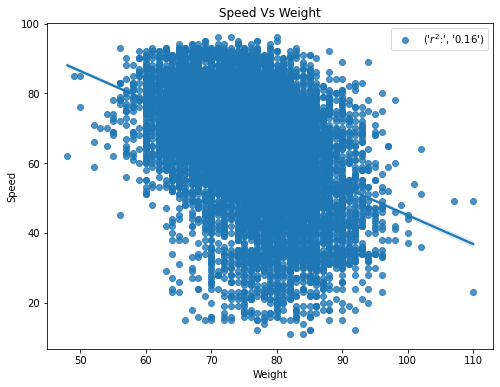

In [ ]:
#  choose the first word in the column values (the weight):
#df_fifa['Weight'] = df_fifa['Weight'].str.split(' ').str[0]
# convert the type of column to int:
#df_fifa['Weight'] = pd.to_numeric(df_fifa['Weight'], errors='coerce')
x = df_fifa['Weight']
y = df_fifa['Speed']
mask = ~np.isnan(x) & ~np.isnan(y)
fig, ax = plt.subplots(1, figsize=(8,6))
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
r2 =  round(r_value**2,3)
ax = sns.regplot(data=df_fifa, x="Weight", y="Speed",label = ("$r^2$:", "{:.2f}".format(r_value**2)))
ax.set_title("Speed Vs Weight")
plt.legend(loc='best')#, label="r-squared:", r_value**2)

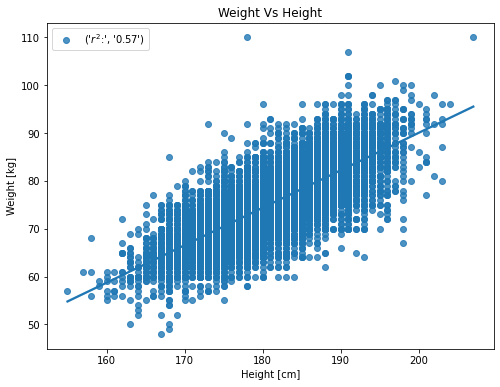

In [ ]:
x = df_fifa['Height']
y = df_fifa['Weight']
mask = ~np.isnan(x) & ~np.isnan(y)
fig, ax = plt.subplots(1, figsize=(8,6))
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
r2 =  round(r_value**2,3)
ax = sns.regplot(data=df_fifa, x="Height", y="Weight",label = ("$r^2$:", "{:.2f}".format(r_value**2)))
ax.set_xlabel("Height [cm]")
ax.set_ylabel("Weight [kg]")
ax.set_title("Weight Vs Height")
plt.legend(loc='best')#, label="r-squared:", r_value**2)

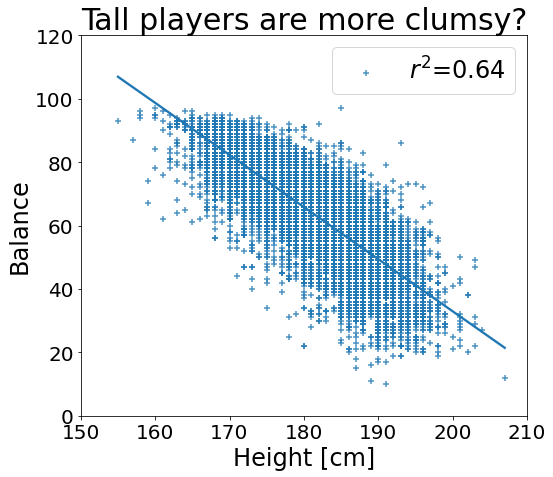

In [ ]:
x = df_fifa['Height']
y = df_fifa['Balance']
font = 24

mask = ~np.isnan(x) & ~np.isnan(y)
fig, ax = plt.subplots(1, figsize=(8,7))
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
r2 =  round(r_value**2,3)
ax = sns.regplot(
                 data = df_fifa,
                 x = "Height",
                 y = "Balance",
                 marker="+",
                 label = "$r^2$=" + "{:.2f}".format(r_value**2)
                 )


ax.set_xlabel("Height [cm]", fontsize = font)
ax.set_ylabel("Balance", fontsize = font)

ax.set_title("Tall players are more clumsy?", fontsize = 30)

plt.xticks(
           ax.get_xticks(),
           #rotation = 'vertical',
           fontsize = font-4
           )   

plt.yticks(
           ax.get_yticks(),
           fontsize = font-4
           )

plt.legend(loc='best', fontsize = font)#, label="r-squared:", r_value**2)

plt.show()


In [ ]:
df_fifa.columns

Index(['Name', 'Nationality', 'National_Position', 'National_Kit', 'Club',
       'Club_Position', 'Club_Kit', 'Club_Joining', 'Contract_Expiry',
       'Rating', 'Height', 'Weight', 'Preffered_Foot', 'Birth_Date', 'Age',
       'Preffered_Position', 'Work_Rate', 'Weak_foot', 'Skill_Moves',
       'Ball_Control', 'Dribbling', 'Marking', 'Sliding_Tackle',
       'Standing_Tackle', 'Aggression', 'Reactions', 'Attacking_Position',
       'Interceptions', 'Vision', 'Composure', 'Crossing', 'Short_Pass',
       'Long_Pass', 'Acceleration', 'Speed', 'Stamina', 'Strength', 'Balance',
       'Agility', 'Jumping', 'Heading', 'Shot_Power', 'Finishing',
       'Long_Shots', 'Curve', 'Freekick_Accuracy', 'Penalties', 'Volleys',
       'GK_Positioning', 'GK_Diving', 'GK_Kicking', 'GK_Handling',
       'GK_Reflexes', 'Continent', 'League', 'Field_Position',
       'Field_Preffered_Position', 'League_Country', 'League_Country_number',
       'Club_median', 'Field_Precise_Position',
       'Field_Prec

## new columns:

In [ ]:
print('original columns:')

df_fifa_unprocessed.columns

original columns:


Index(['Name', 'Nationality', 'National_Position', 'National_Kit', 'Club',
       'Club_Position', 'Club_Kit', 'Club_Joining', 'Contract_Expiry',
       'Rating', 'Height', 'Weight', 'Preffered_Foot', 'Birth_Date', 'Age',
       'Preffered_Position', 'Work_Rate', 'Weak_foot', 'Skill_Moves',
       'Ball_Control', 'Dribbling', 'Marking', 'Sliding_Tackle',
       'Standing_Tackle', 'Aggression', 'Reactions', 'Attacking_Position',
       'Interceptions', 'Vision', 'Composure', 'Crossing', 'Short_Pass',
       'Long_Pass', 'Acceleration', 'Speed', 'Stamina', 'Strength', 'Balance',
       'Agility', 'Jumping', 'Heading', 'Shot_Power', 'Finishing',
       'Long_Shots', 'Curve', 'Freekick_Accuracy', 'Penalties', 'Volleys',
       'GK_Positioning', 'GK_Diving', 'GK_Kicking', 'GK_Handling',
       'GK_Reflexes'],
      dtype='object')

In [ ]:
print('new columns:')

list( df_fifa.drop( columns=df_fifa_unprocessed.columns ).columns )

new columns:


['Continent',
 'League',
 'Field_Position',
 'Field_Preffered_Position',
 'League_Country',
 'League_Country_number',
 'Club_median',
 'Field_Precise_Position',
 'Field_Precise_Preffered_Position',
 'league_number_in_the_country']

## boxplots :

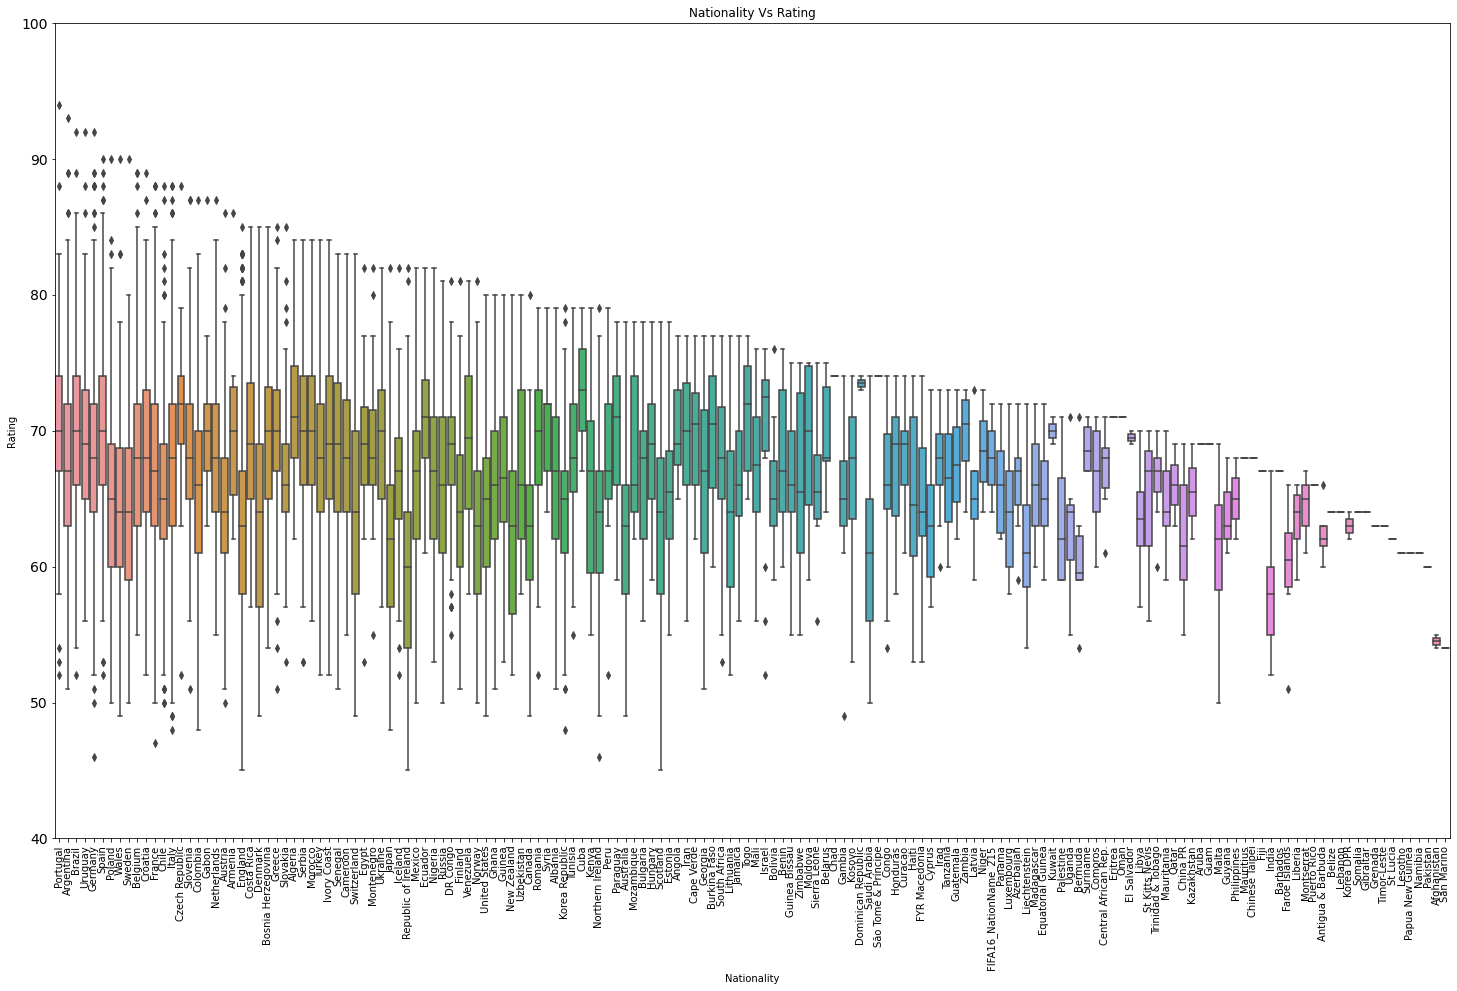

In [ ]:
x = df_fifa['Nationality'] #x column
y = df_fifa['Rating'] # y column
# mask = ~np.isnan(x) & ~np.isnan(y)  # mask for non - Nan values
fig, ax = plt.subplots(1, figsize=(25,15))
# slope, intercept, r_value, p_value, std_err = stats.linregress(x[mask], y[mask]) # statistic parameters
# r2 =  round(r_value**2,3)
ax = sns.boxplot(data=df_fifa, x="Nationality", y="Rating")
ax.set_title("Nationality Vs Rating")

plt.xticks(
           ax.get_xticks(),
           rotation = 'vertical',
           fontsize = 10
           )   

plt.yticks(
           ax.get_yticks(),
           fontsize = 14
           )

plt.show()

In [ ]:
df_fifa.columns

Index(['Name', 'Nationality', 'National_Position', 'National_Kit', 'Club',
       'Club_Position', 'Club_Kit', 'Club_Joining', 'Contract_Expiry',
       'Rating', 'Height', 'Weight', 'Preffered_Foot', 'Birth_Date', 'Age',
       'Preffered_Position', 'Work_Rate', 'Weak_foot', 'Skill_Moves',
       'Ball_Control', 'Dribbling', 'Marking', 'Sliding_Tackle',
       'Standing_Tackle', 'Aggression', 'Reactions', 'Attacking_Position',
       'Interceptions', 'Vision', 'Composure', 'Crossing', 'Short_Pass',
       'Long_Pass', 'Acceleration', 'Speed', 'Stamina', 'Strength', 'Balance',
       'Agility', 'Jumping', 'Heading', 'Shot_Power', 'Finishing',
       'Long_Shots', 'Curve', 'Freekick_Accuracy', 'Penalties', 'Volleys',
       'GK_Positioning', 'GK_Diving', 'GK_Kicking', 'GK_Handling',
       'GK_Reflexes', 'Continent', 'League', 'Field_Position',
       'Field_Preffered_Position', 'League_Country', 'League_Country_number',
       'Club_median', 'Field_Precise_Position',
       'Field_Prec

In [ ]:
df_fifa.loc[ df_fifa[ "league_number_in_the_country" ].notna() ]

Name          Nationality National_Position  National_Kit  \
0      Cristiano Ronaldo             Portugal                LS           7.0   
1           Lionel Messi            Argentina                RW          10.0   
2                 Neymar               Brazil                LW          10.0   
3            Luis Suárez              Uruguay                LS           9.0   
4           Manuel Neuer              Germany                GK           1.0   
...                  ...                  ...               ...           ...   
17583        Adam Dunbar  Republic of Ireland               NaN           NaN   
17584       Dylan McGoey  Republic of Ireland               NaN           NaN   
17585    Tommy Ouldridge              England               NaN           NaN   
17586         Mark Foden             Scotland               NaN           NaN   
17587   Barry Richardson              England               NaN           NaN   

                 Club Club_Position  Club_Kit Club_Joining  Contract_Expiry  \
0         Real Madrid            LW       7.0   07/01/2009           2021.0   
1        FC Barcelona            RW      10.0   07/01/2004           2018.0   
2        FC Barcelona            LW      11.0   07/01/2013           2021.0   
3        FC Barcelona            ST       9.0   07/11/2014           2021.0   
4           FC Bayern            GK       1.0   07/01/2011           2021.0   
...               ...           ...       ...          ...              ...   
17583  Wexford Youths           Sub      30.0   02/01/2016           2020.0   
17584   Longford Town           Sub      28.0   01/01/2016           2020.0   
17585    Swindon Town           Res      32.0   03/03/2015           2023.0   
17586     Ross County           Sub      45.0   03/02/2016           2017.0   
17587         Wycombe           Sub      13.0   01/30/2014           2023.0   

       Rating  ...      Continent                                 League  \
0          94  ...         Europe                     [Spain1] Liga BBVA   
1          93  ...  South America                     [Spain1] Liga BBVA   
2          92  ...  South America                     [Spain1] Liga BBVA   
3          92  ...  South America                     [Spain1] Liga BBVA   
4          92  ...         Europe                  [Germany1] Bundesliga   
...       ...  ...            ...                                    ...   
17583      45  ...         Europe                                      0   
17584      45  ...         Europe  [Rep. Ireland1] SSE Airtricity League   
17585      45  ...         Europe           [England3] Football League 1   
17586      45  ...         Europe       [Scotland1] Scottish Premiership   
17587      45  ...         Europe           [England4] Football League 2   

      Field_Position Field_Preffered_Position  League_Country  \
0          attacking                attacking           Spain   
1          attacking                attacking           Spain   
2          attacking                attacking           Spain   
3          attacking                attacking           Spain   
4         goalkeeper               goalkeeper         Germany   
...              ...                      ...             ...   
17583     substitute               goalkeeper               0   
17584     substitute               goalkeeper    Rep. Ireland   
17585       reserves                 midfield         England   
17586     substitute               goalkeeper        Scotland   
17587     substitute               goalkeeper         England   

      League_Country_number  Club_median  Field_Precise_Position  \
0                    Spain1         82.0               attacking   
1                    Spain1         80.0               attacking   
2                    Spain1         80.0               attacking   
3                    Spain1         80.0               attacking   
4                  Germany1         83.0              goalkeeper

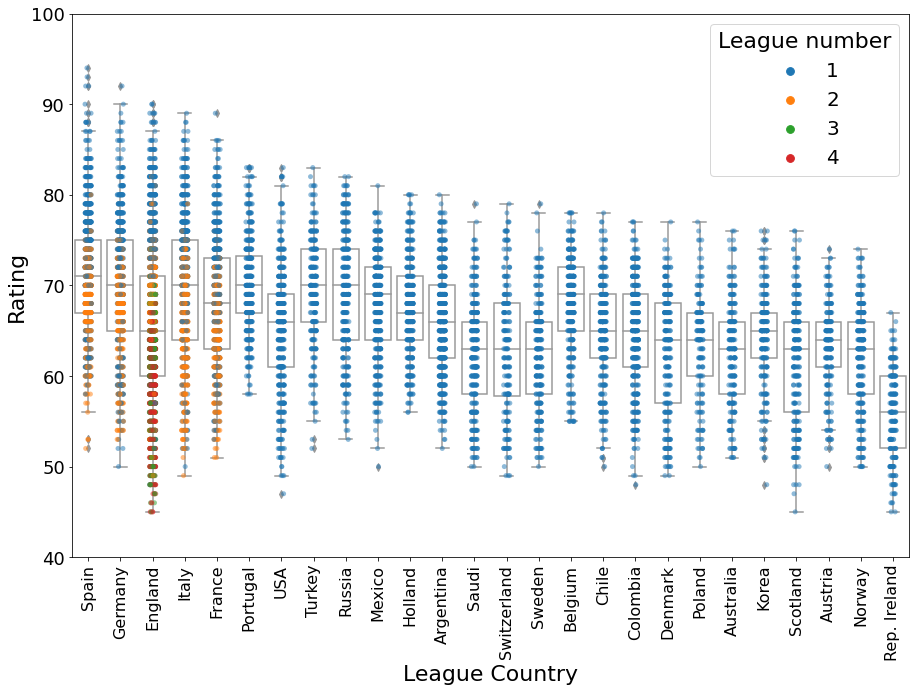

In [ ]:
fig, ax = plt.subplots(1, figsize=(15, 10))

#df_league_number = df_fifa.loc[ df_fifa[ "league_number_in_the_country" ].notna() ]
df_league_country = df_fifa.loc[ df_fifa[ "League_Country" ] != '0' ]

ax = sns.boxplot(
                 data = df_league_country,
                 x="League_Country",
                 y="Rating",
                 color='white'
                 )
sns.stripplot(
              data = df_league_country,
              x="League_Country",
              y="Rating",
              hue="league_number_in_the_country",
              #color='black',
              alpha=0.5
             )

#ax.set_title("Continent Vs Rating")


plt.xlabel( 'League Country', fontsize = 22 )

plt.ylabel( 'Rating', fontsize = 22 )


plt.xticks(
           ax.get_xticks(),
           rotation = 'vertical',
           fontsize = 16
           )   

plt.yticks(
           ax.get_yticks(),
           fontsize = 18
           )


plt.legend(
           fontsize = 20,
           title = 'League number',
           title_fontsize = 22
           #loc='best',
           #bbox_to_anchor=(1, 0.75, 0.5, 0.5)
           )

plt.show()

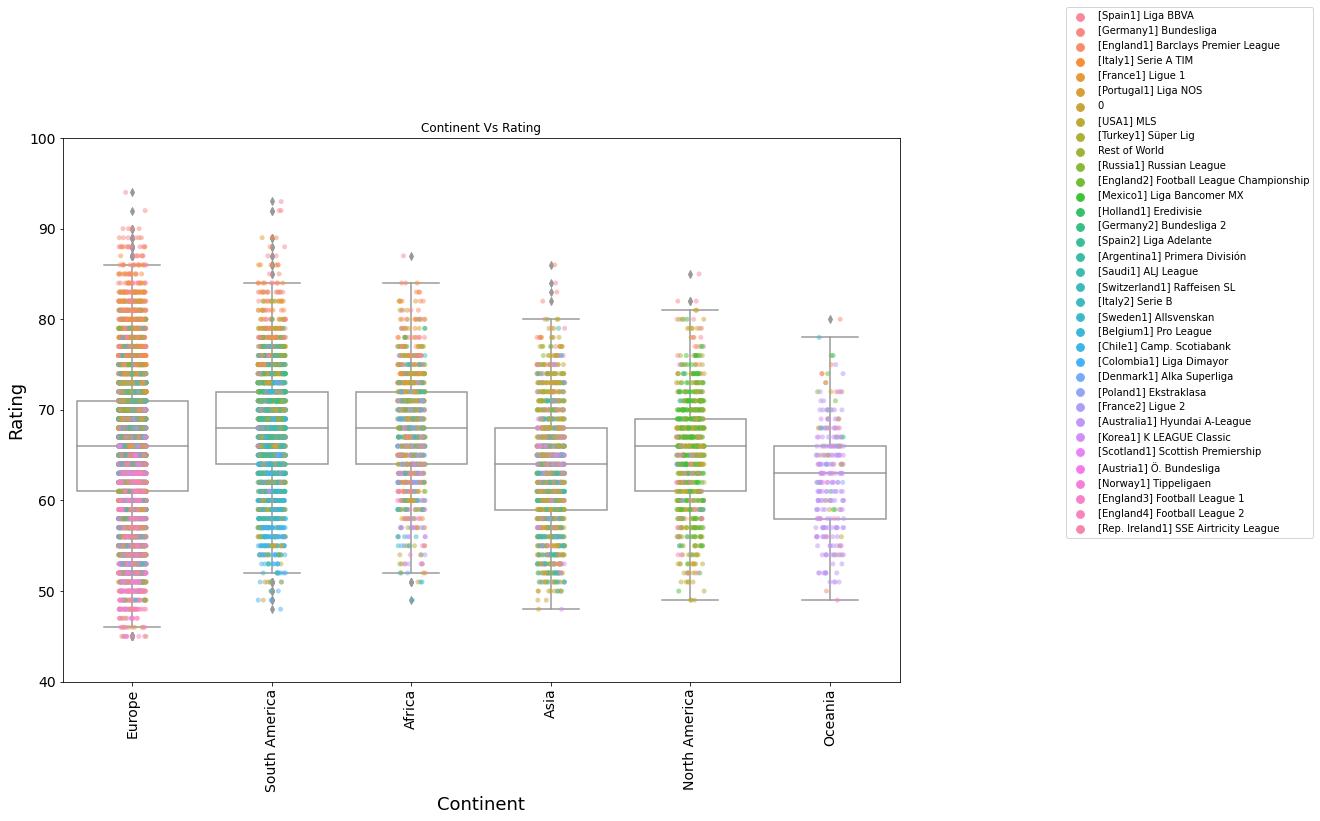

In [ ]:
fig, ax = plt.subplots(1, figsize=(15, 10))

ax = sns.boxplot(
                data=df_fifa,
                 x="Continent",
                 y="Rating",
                 color='white'
                 )
sns.stripplot(
              data=df_fifa,
              x="Continent",
              y="Rating",
              hue="League",
              #color='black',
              alpha=0.5
             )

ax.set_title("Continent Vs Rating")


plt.xlabel( 'Continent', fontsize = 18 )

plt.ylabel( 'Rating', fontsize = 18 )


plt.xticks(
           ax.get_xticks(),
           rotation = 'vertical',
           fontsize = 14
           )   

plt.yticks(
           ax.get_yticks(),
           fontsize = 14
           )


plt.legend(
          loc='best',
           bbox_to_anchor=(1, 0.75, 0.5, 0.5)
           )

plt.show()

In [ ]:
def boxplot(
            x,
            y,
            figsize = (15,8),
            vertical = False,
            title=''
            ):
  
  fig, ax = plt.subplots(
                         1,
                         figsize = figsize
                         )

  ax = sns.boxplot(
                  data=df_fifa.loc[ df_fifa[x] != '0' ],
                  x=x,
                  y=y,
                  color='white'
                  )
  sns.stripplot(
                data=df_fifa,
                x=x,
                y=y,
                color = 'black',
                alpha=0.2
              )

  
  plt.xlabel( x, fontsize = 18 )

  plt.ylabel( y, fontsize = 18 )

  if vertical:

    plt.xticks(
              ax.get_xticks(),
              rotation = 'vertical',
              fontsize = 14
              )
  else:  
    plt.xticks(
              ax.get_xticks(),
              fontsize = 14
              )
    
  plt.yticks(
            ax.get_yticks(),
            fontsize = 14
            )



  ax.set_title( title, fontsize=20 )

  plt.show()

  return

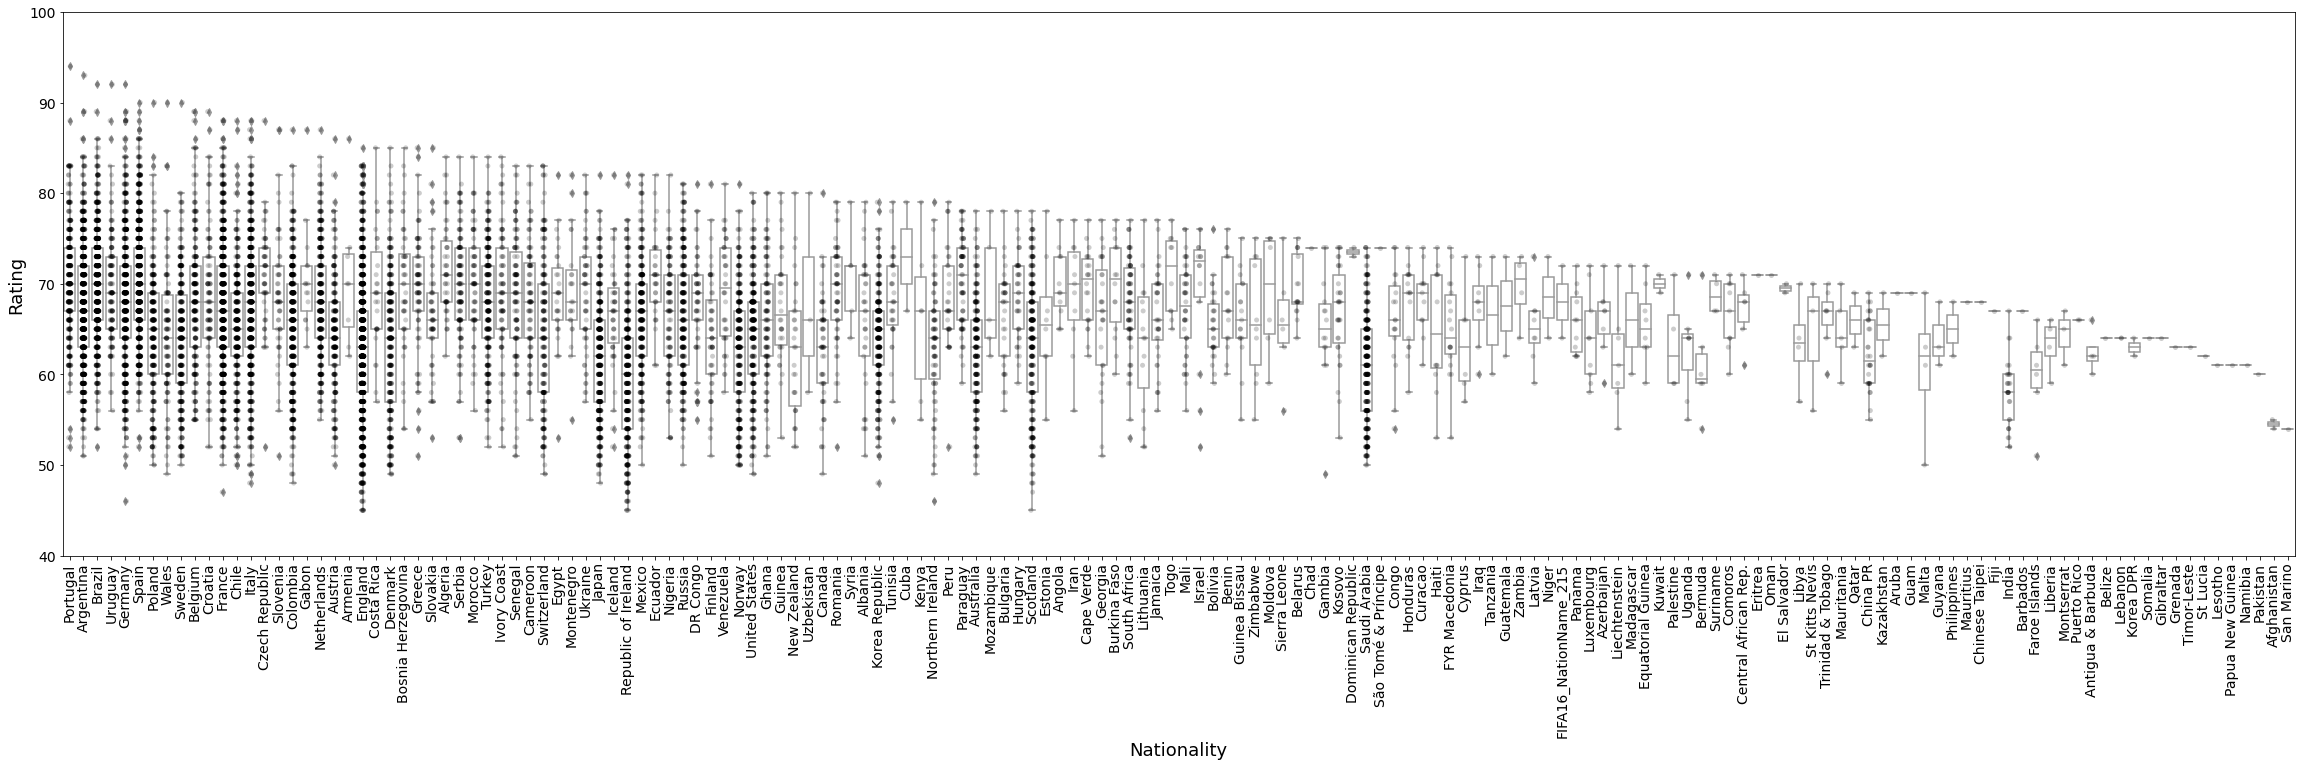

In [ ]:
boxplot(
        "Nationality",
        "Rating",
        figsize=(40,10),
        vertical = True
        )

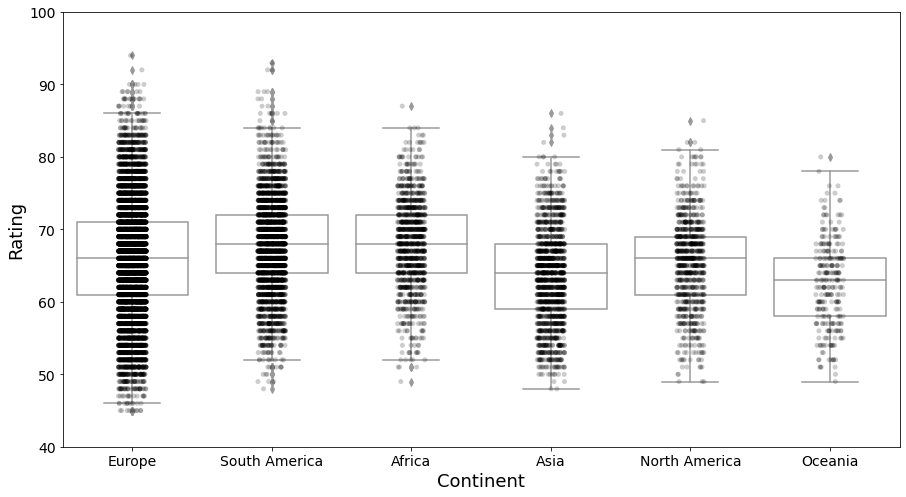

In [ ]:
boxplot( "Continent", "Rating" )

In [ ]:
df_fifa.columns

Index(['Name', 'Nationality', 'National_Position', 'National_Kit', 'Club',
       'Club_Position', 'Club_Kit', 'Club_Joining', 'Contract_Expiry',
       'Rating', 'Height', 'Weight', 'Preffered_Foot', 'Birth_Date', 'Age',
       'Preffered_Position', 'Work_Rate', 'Weak_foot', 'Skill_Moves',
       'Ball_Control', 'Dribbling', 'Marking', 'Sliding_Tackle',
       'Standing_Tackle', 'Aggression', 'Reactions', 'Attacking_Position',
       'Interceptions', 'Vision', 'Composure', 'Crossing', 'Short_Pass',
       'Long_Pass', 'Acceleration', 'Speed', 'Stamina', 'Strength', 'Balance',
       'Agility', 'Jumping', 'Heading', 'Shot_Power', 'Finishing',
       'Long_Shots', 'Curve', 'Freekick_Accuracy', 'Penalties', 'Volleys',
       'GK_Positioning', 'GK_Diving', 'GK_Kicking', 'GK_Handling',
       'GK_Reflexes', 'Continent', 'League', 'Field_Position',
       'Field_Preffered_Position', 'League_Country', 'League_Country_number',
       'Club_median', 'Field_Precise_Position',
       'Field_Prec

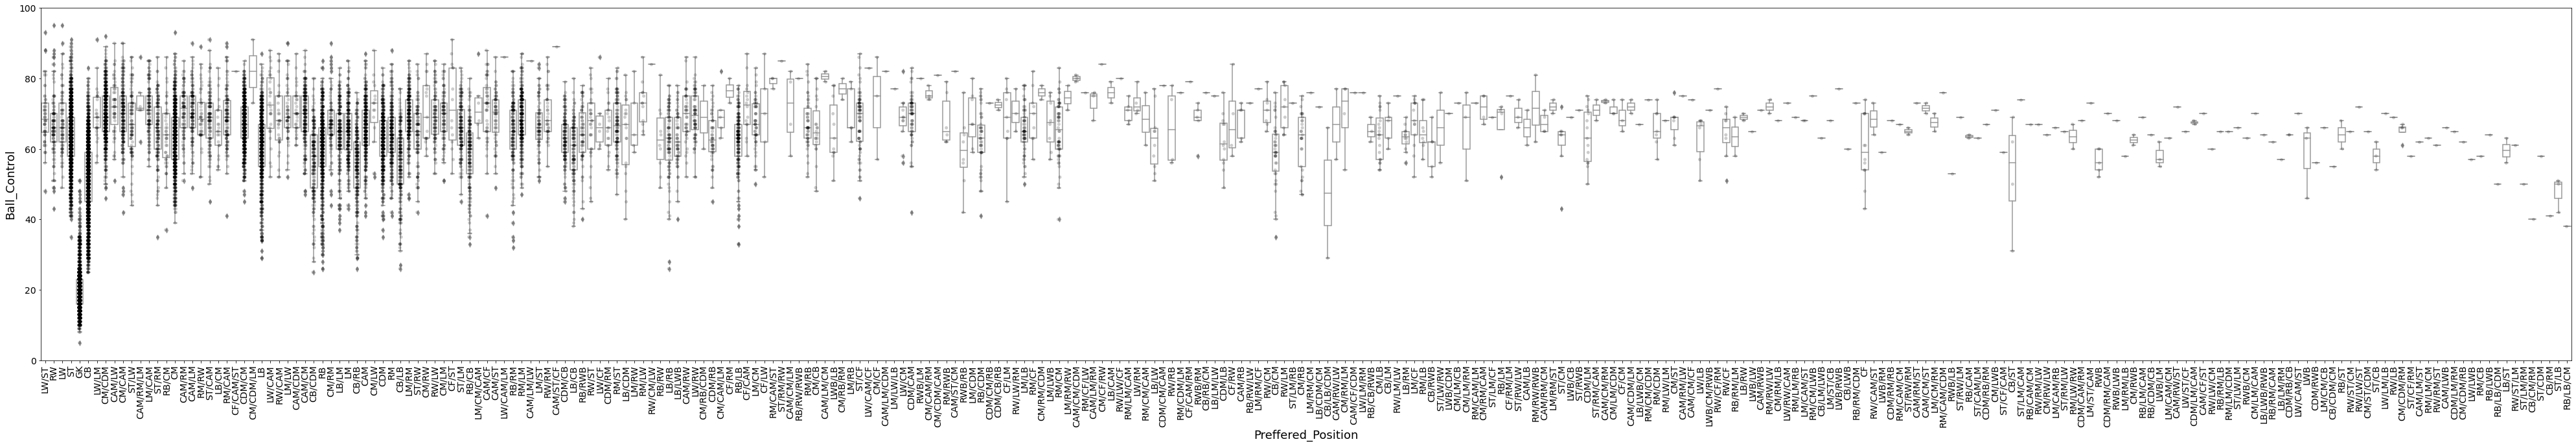

In [ ]:
boxplot(
        "Preffered_Position",
        "Ball_Control",
        figsize=(70,10),
        vertical = True
        )

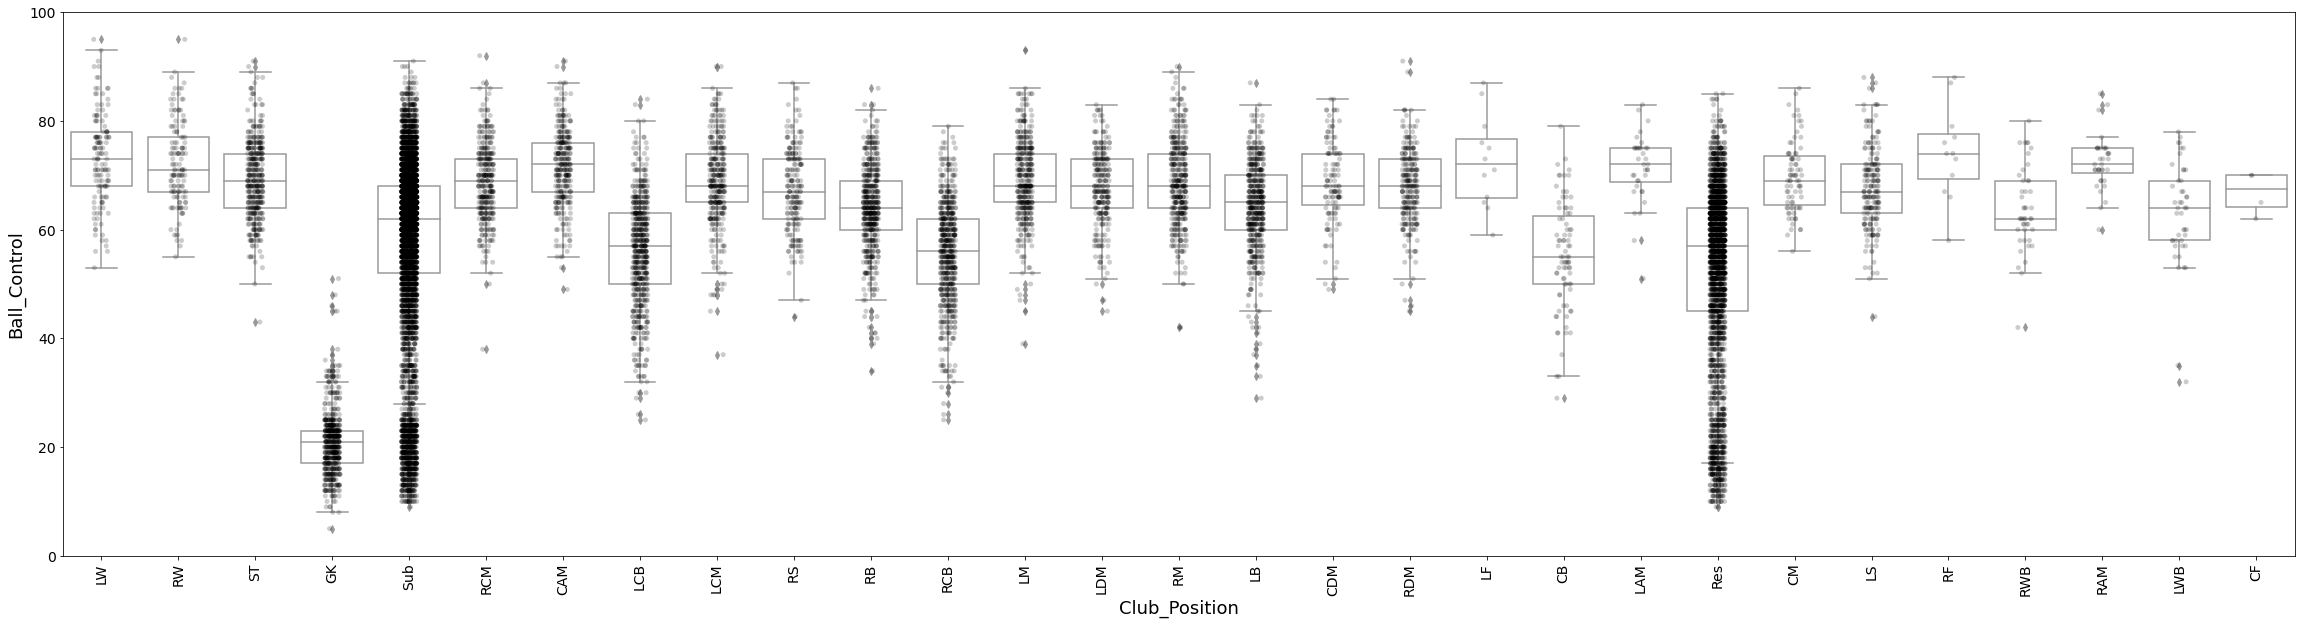

In [ ]:
boxplot(
        "Club_Position",
        "Ball_Control",
        figsize=(40,10),
        vertical = True
        )

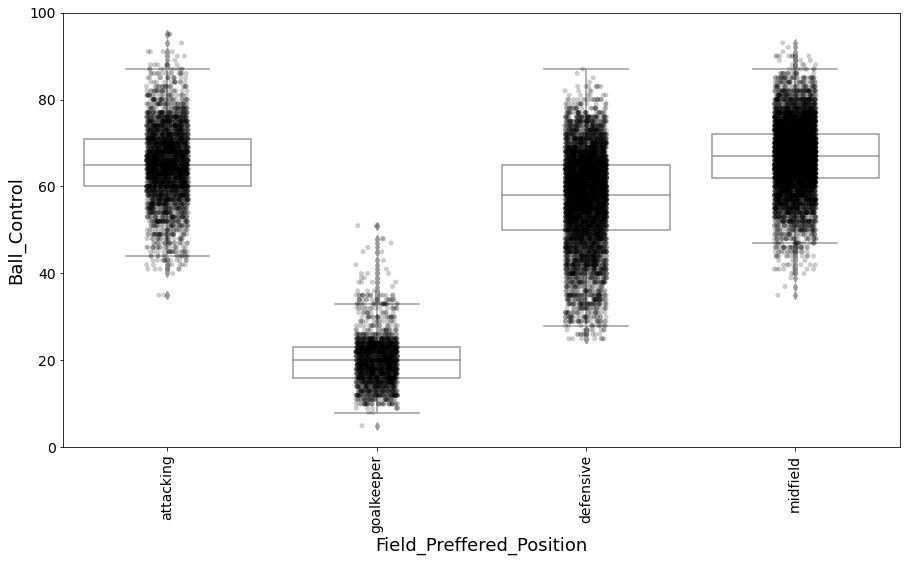

In [ ]:
boxplot(
        "Field_Preffered_Position",
        "Ball_Control",
        #figsize=(40,10),
        vertical = True
        )



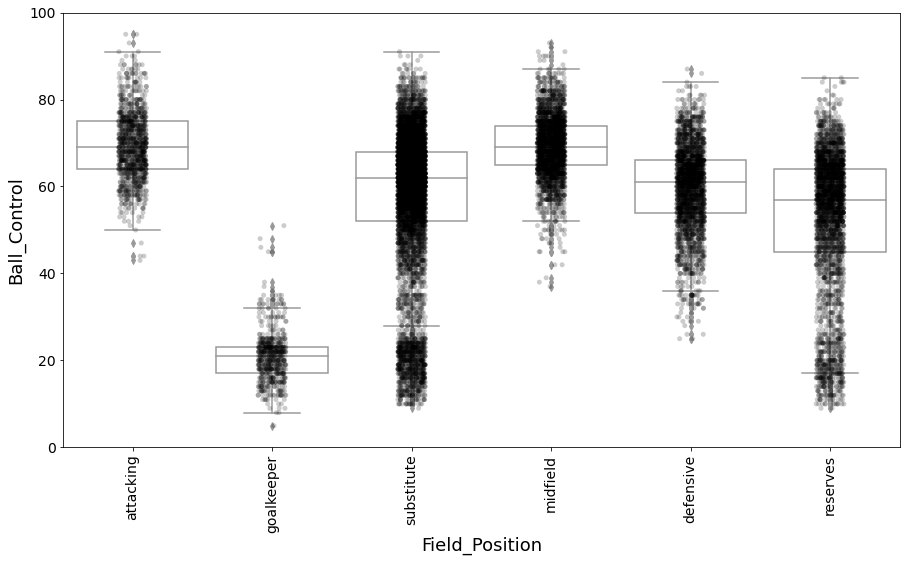

In [ ]:
boxplot(
        "Field_Position",
        "Ball_Control",
        #figsize=(40,10),
        vertical = True
        )


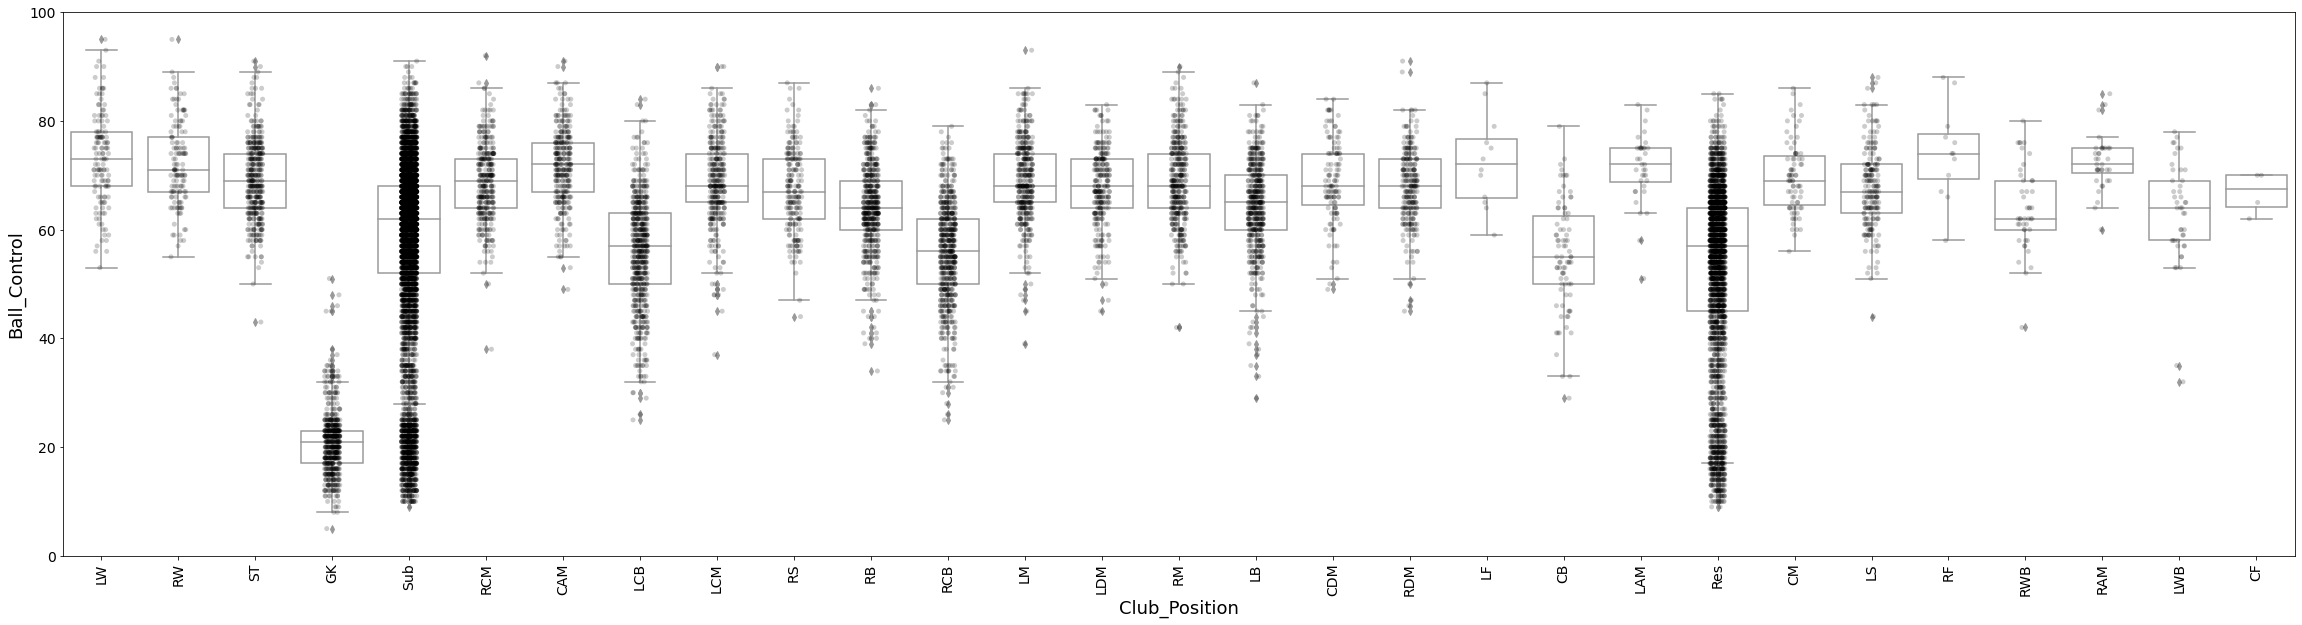

In [ ]:
boxplot(
        "Club_Position",
        "Ball_Control",
        figsize=(40,10),
        vertical = True
        )

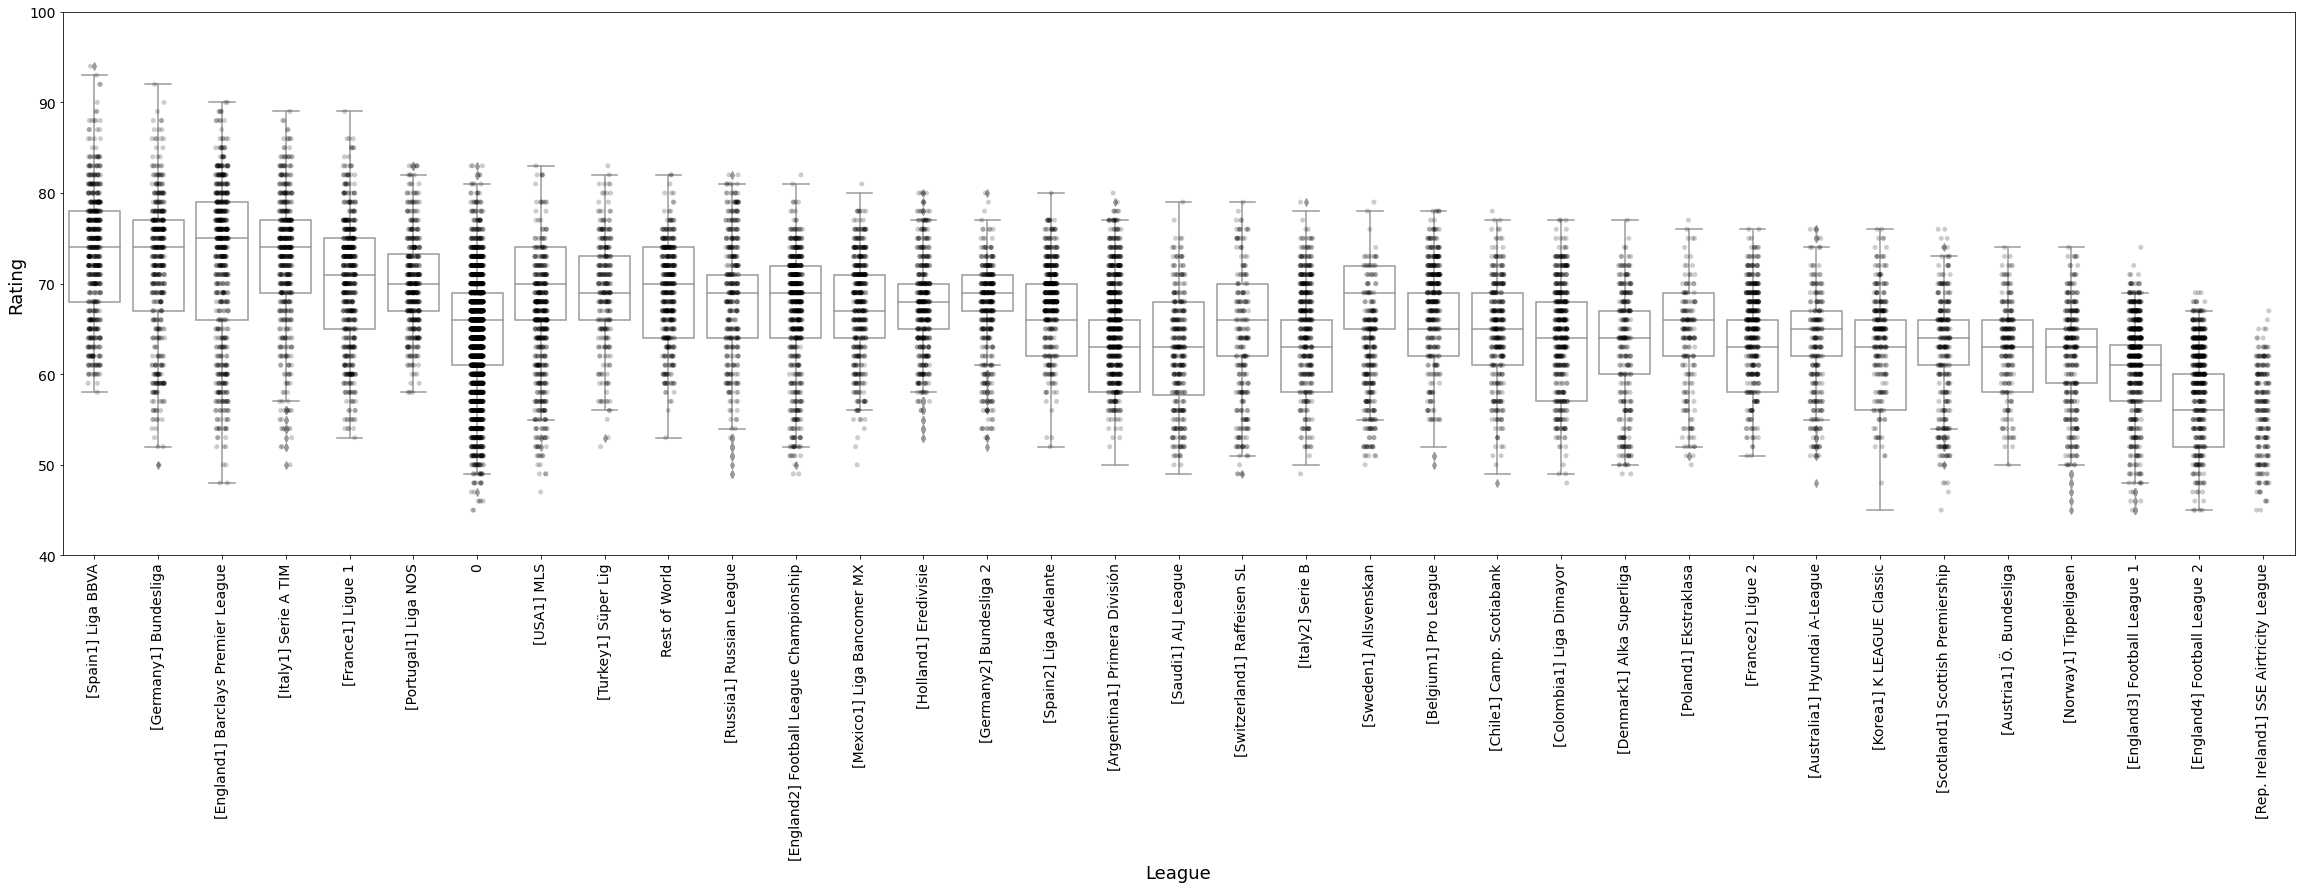

In [ ]:
boxplot("League", "Rating", figsize=(40,10), vertical = True)

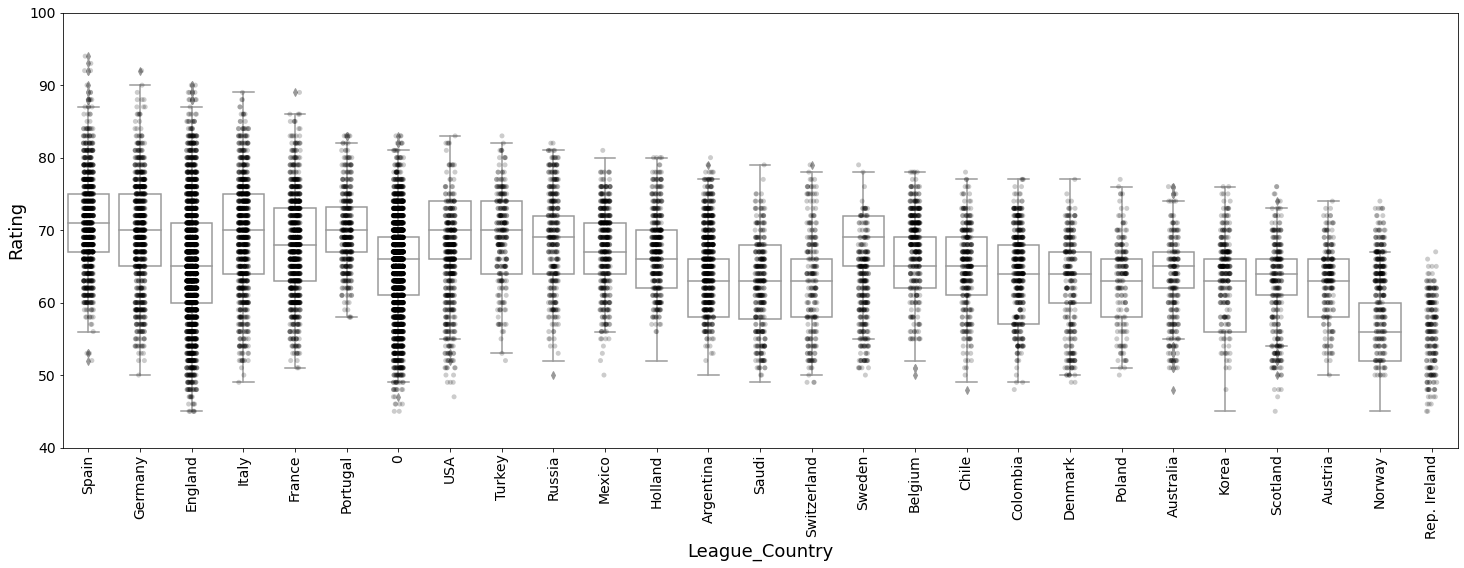

In [ ]:
boxplot(
        "League_Country",
        "Rating",
        figsize=(25,8),
        vertical = True
        )

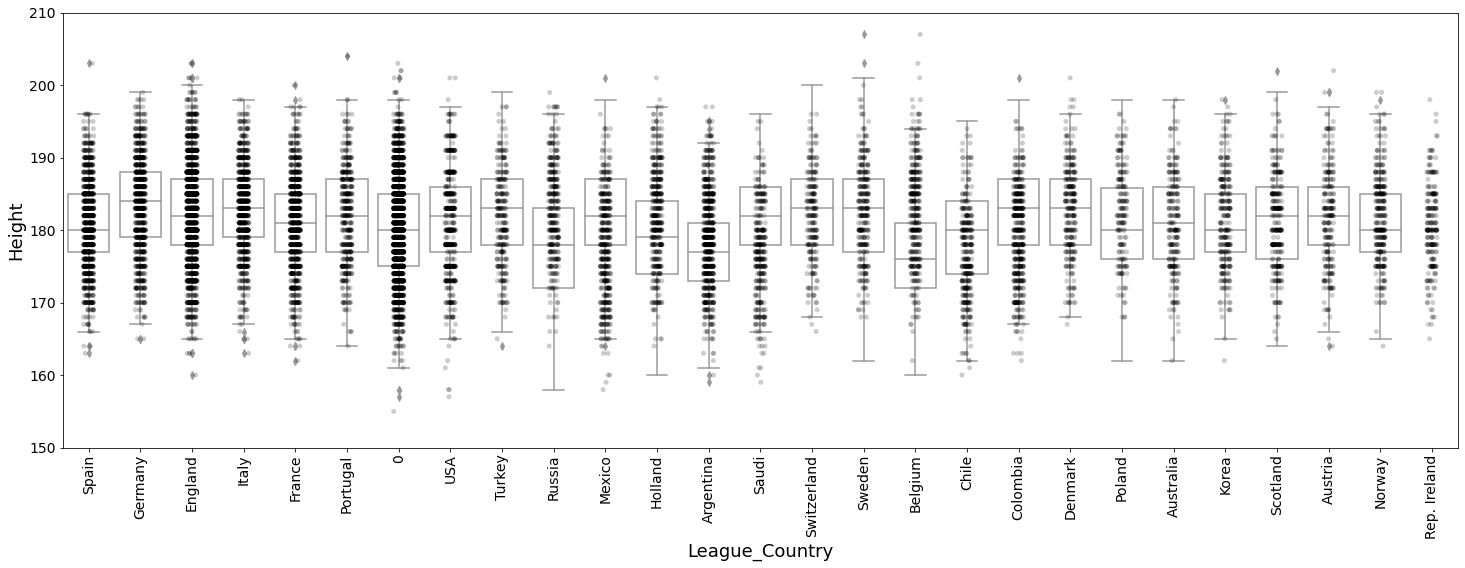

In [ ]:
boxplot(
        "League_Country",
        "Height",
        figsize=(25,8),
        vertical = True
        )

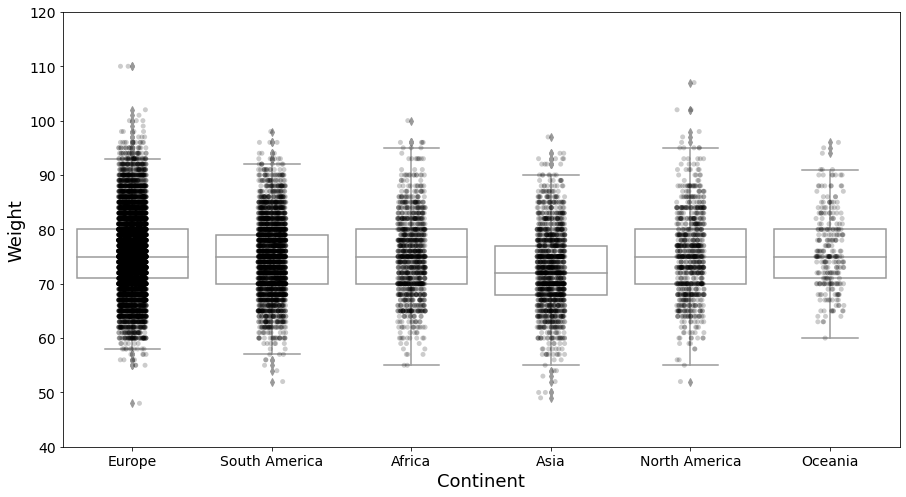

In [ ]:
boxplot( "Continent", "Weight" )

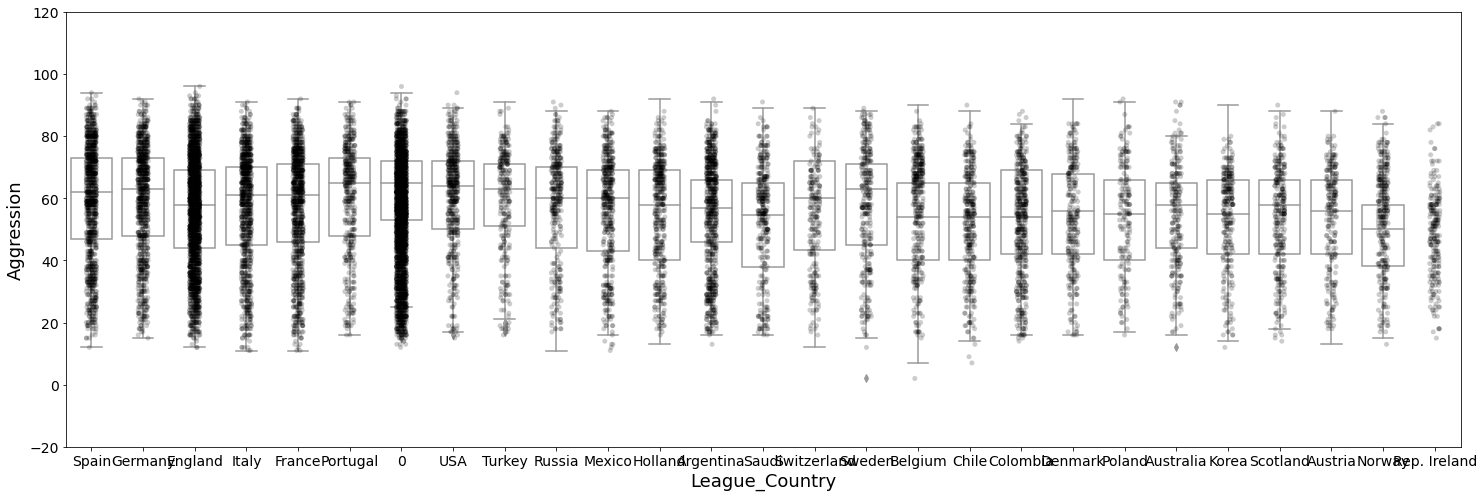

In [ ]:
boxplot(
        "League_Country",
        "Aggression",
        figsize=(25,8)
        )

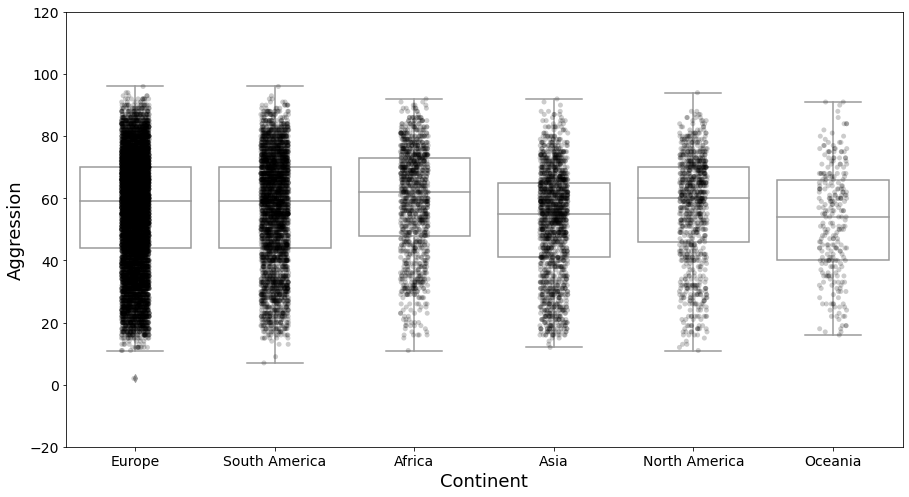

In [ ]:
boxplot( "Continent", "Aggression" )

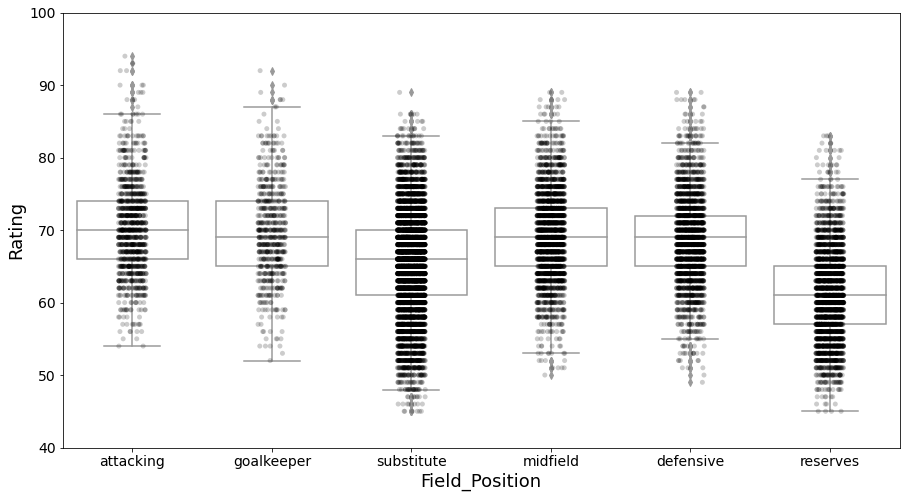

In [ ]:
boxplot( "Field_Position", "Rating" )

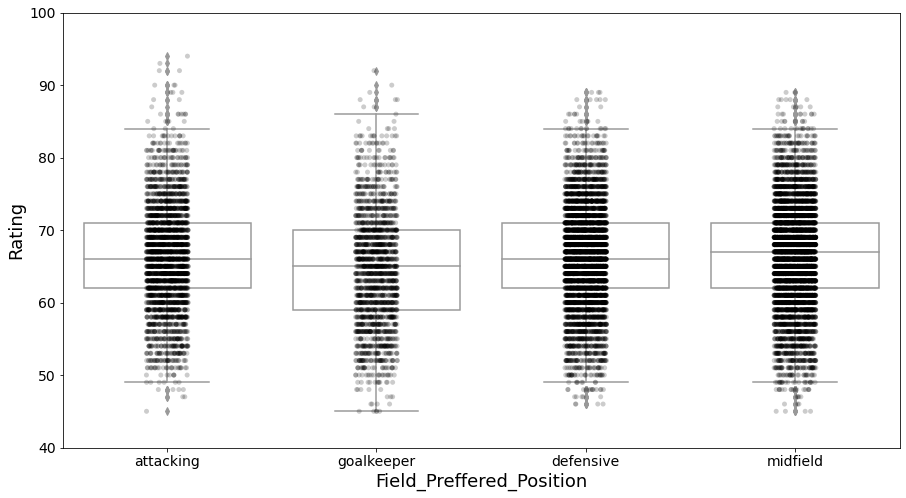

In [ ]:
boxplot( "Field_Preffered_Position", "Rating" )

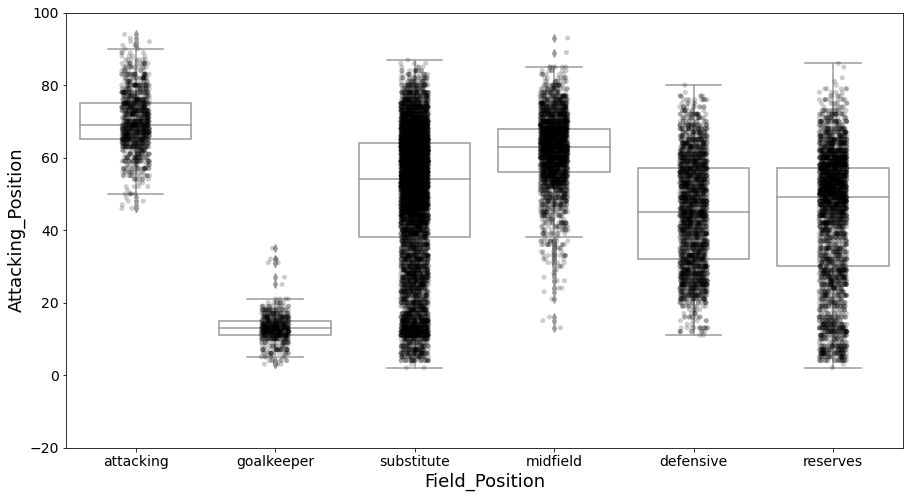

In [ ]:
boxplot( "Field_Position", "Attacking_Position" )

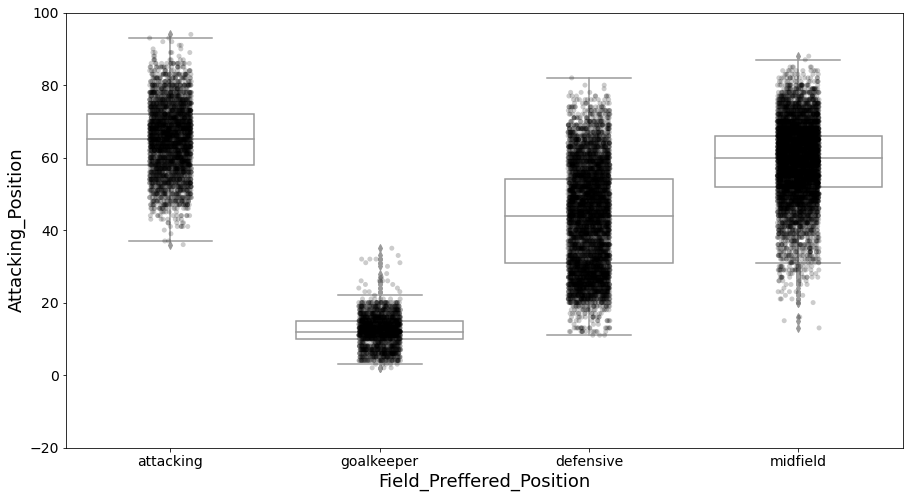

In [ ]:
boxplot( "Field_Preffered_Position", "Attacking_Position" )

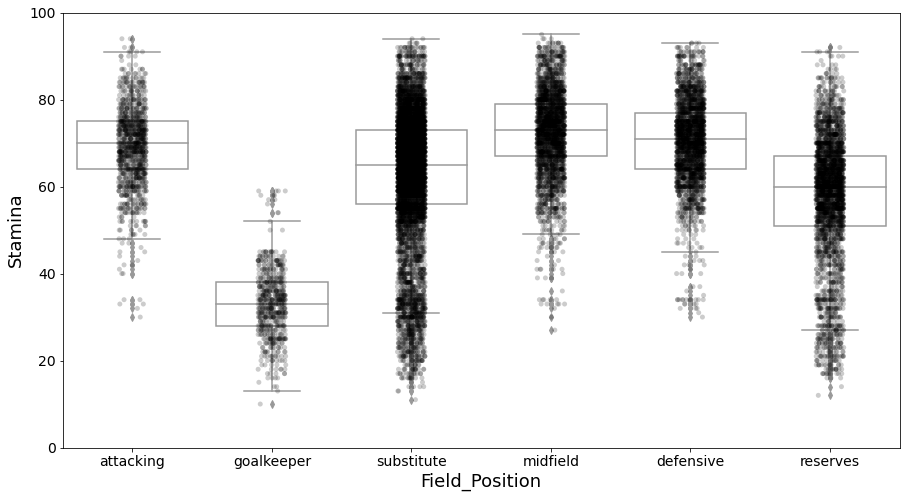

In [ ]:
boxplot( "Field_Position", "Stamina" )

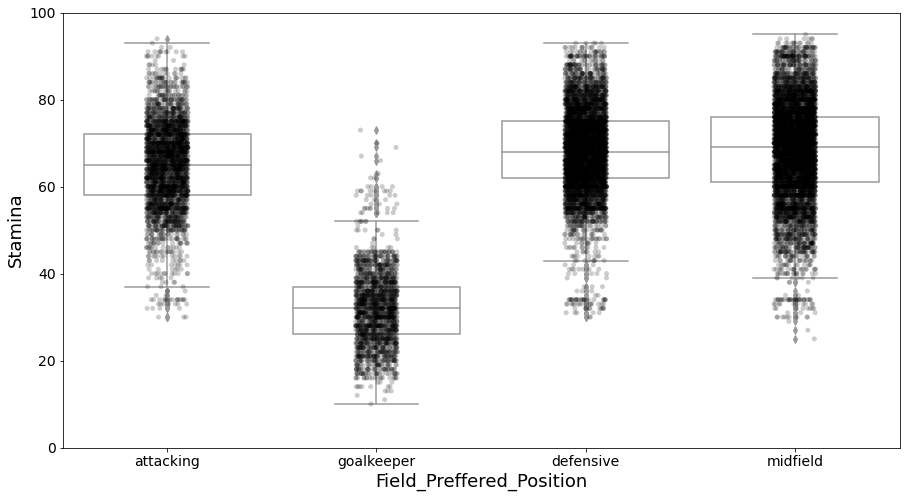

In [ ]:
boxplot( "Field_Preffered_Position", "Stamina" )


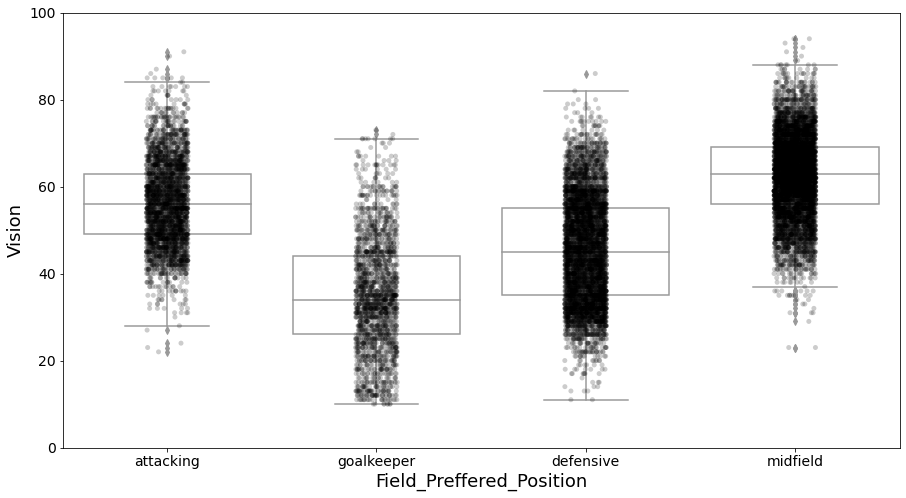

In [ ]:
boxplot( "Field_Preffered_Position", "Vision" )

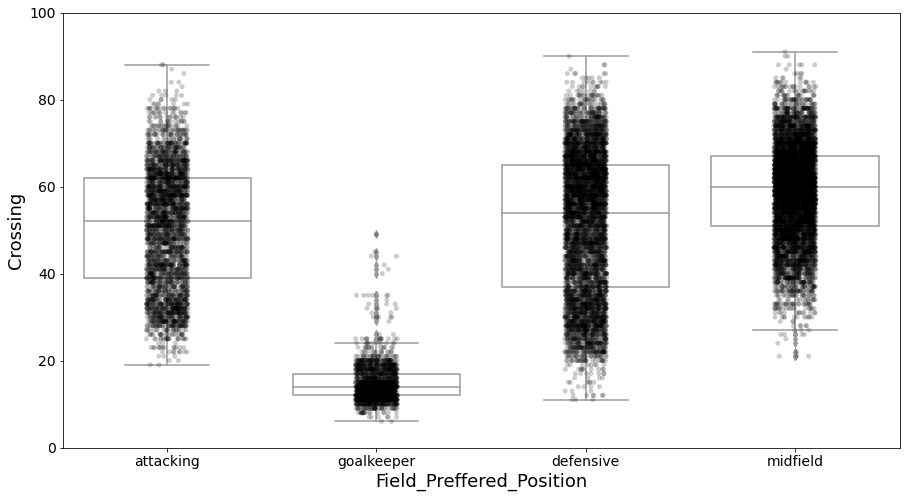

In [ ]:
boxplot( "Field_Preffered_Position", "Crossing" )

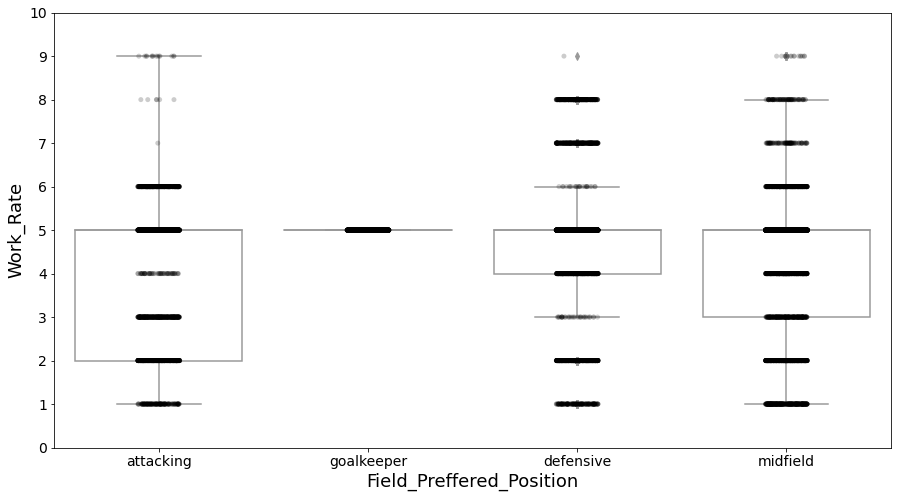

In [ ]:
boxplot( "Field_Preffered_Position", "Work_Rate" )

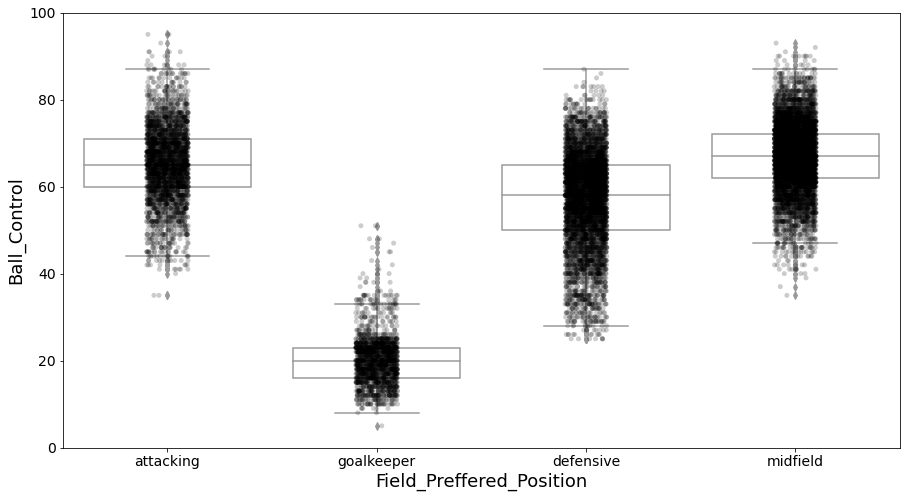

In [ ]:
boxplot( "Field_Preffered_Position", "Ball_Control" )